**Team Name:** Team 010

**Team Members:** Austin Johnson, Darshan Kamalakar, Parv Khandelwal, Yi Jen Huang, Zih Han Shen

# **Executive Summary of Project:**

The COVID-19 pandemic has significantly impacted businesses and consumer behavior, particularly in the restaurant industry. This project analyzes Yelp reviews and business data from bars in California to uncover trends in customer sentiment and business adaptation during the pandemic. Given the nature of their services and the evolving public health guidelines, it’s possible that bars encountered specific challenges that influenced both customer engagement and operational adjustments. By identifying key drivers of satisfaction, operational resilience, and recovery within these specific restaurant segments, we aim to provide actionable insights for bar owners, policymakers, and consumers, supporting informed decision-making.

# **Proposed Solution**

This analysis aims to uncover trends in customer sentiment and business adaptation within California-based bars during the COVID-19 pandemic. The solution is structured into four key stages: Data Preprocessing, Theme Extraction, Data Analysis, and Insights Generation, to provide actionable insights for the bar owners, policymakers, and consumers.


1. Data Preprocessing

  Filtering:
    - Focus exclusively on California-based businesses in the bar categories.
    - Limit the analysis to reviews written during the COVID-19 period (March–December 2020).
  
  Text Cleaning:
    - Use NLTK to tokenize text and remove stop words.
    - Remove special characters and standardize text formatting.
    - Apply spaCy for lemmatization to ensure words are reduced to their base form.
    - Prepare cleaned text for sentiment analysis and topic modeling.

2. Theme Extraction using BERT
  Topic Modeling: Apply BERT to identify recurring themes within restaurant attributes and customer reviews.

3. Data Analysis

  Sentiment & Rating Analysis:
    - Apply VADER (NLTK) for sentiment analysis to classify reviews as positive or negative.
  
  Operational Adaptation Analysis:
    - Identify bars that adapted by adding delivery, takeout, or outdoor seating.
    - Use spaCy’s Named Entity Recognition (NER) to extract adaptation-related terms (e.g.,“contactless payment”).
    - Compare ratings, review counts, and sentiment trends between adaptive and non-adaptive businesses.

4. Customer Segmentation

  By identifying the high-rating clusters with consistent loyalty in leaving reviews, we can recommend targeting these customers for loyalty programs or special promotions.


5. Generating Insights
  
  The process above will enable us to generate actionable insights, identifying key trends and patterns in customer behavior, operational changes, and engagement during the pandemic. Once the analysis is complete, we can then provide targeted recommendations for bar owners, policymakers, and consumers.

 - Summarize findings on customer sentiment trends and operational resilience.
 -  Provide data-driven recommendations for bar owners, policymakers, and consumers.

# **Data Sources**

In [ ]:
import pandas as pd
import gdown
import numpy as np
import spacy
!python -m spacy download en_core_web_sm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from nltk.tokenize import word_tokenize
!pip install wordcloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import nltk
nltk.download('punkt')
from sklearn.decomposition import LatentDirichletAllocation
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import string
!pip install bertopic
from bertopic import BERTopic
from sklearn.preprocessing import LabelEncoder
import torch
from transformers import BertTokenizer, BertModel
!pip install umap-learn
from umap import UMAP
from textblob import TextBlob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


- List the data sources
  1. Business data
  2. Review data


In [ ]:
business_id = "19GkFY088ZLTd7BWcCXQvj4yPT0Wzqs5R"
gdown.download(f"https://drive.google.com/uc?id={business_id}", "business.csv", quiet=False)
business = pd.read_csv("business.csv")
business.head()

Downloading...
From: https://drive.google.com/uc?id=19GkFY088ZLTd7BWcCXQvj4yPT0Wzqs5R
To: /content/business.csv
100%|██████████| 99.1M/99.1M [00:00<00:00, 109MB/s]


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
business.shape

(150346, 14)

In [ ]:
review_id = "1jFG1aYxWTNJVkI5235JWDLEyN1AOUUnH"
gdown.download(f"https://drive.google.com/uc?id={review_id}", "review.csv", quiet=False)
review = pd.read_csv("review.csv")
review.head()

Downloading...
From (original): https://drive.google.com/uc?id=1jFG1aYxWTNJVkI5235JWDLEyN1AOUUnH
From (redirected): https://drive.google.com/uc?id=1jFG1aYxWTNJVkI5235JWDLEyN1AOUUnH&confirm=t&uuid=647c2e6d-06cb-4165-9cd6-192a14472e90
To: /content/review.csv
100%|██████████| 4.68G/4.68G [00:56<00:00, 82.2MB/s]


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
review.shape

(6990282, 9)

- Data Usage Considerations:
  - business: Analyze how restaurants in California (CA) were affected by the pandemic and how they adapted their operations to changing circumstances. It includes factors such as customer ratings, and business attributes. Additionally, business data provides insights into restaurant category (bars), allowing for a more granular analysis of how different types of establishments responded to the crisis.
  - review: Sentiment and rating analysis will be a core component of the project.
  - tip: To enhance insights from reviews with user tips.

- Provide the descriptions and links of the external data sources
  
  - The Yelp dataset: https://www.yelp.com/dataset/download
    - Business Data: The business dataset contains information about businesses listed on Yelp, including their location, category, attributes, and user ratings.

    - Review Data: This is the main dataset containing Yelp reviews. Each record represents a review left by a user for a specific business. Reviews include user ratings (stars), the helpfulness (useful, funny, cool votes), review text, and the date the review was posted. This dataset is crucial for sentiment analysis, as it helps to identify customer opinions, which could be analyzed to track how businesses adapted during the pandemic.

  - Covid-19 Data: https://github.com/CSSEGISandData/COVID-19

   This data provides information on COVID-19 case trends, regional lockdowns, restrictions, and other relevant health data. Understanding when lockdowns and restrictions were in place can help correlate sentiment changes with the timeline of the pandemic. We will use this dataset, only if necessary.
  

# **Data Preprocessing**

Provide the filtering/selection criteria you applied to the Yelp data.

  - Filtering reviews to focus on the period during the COVID-19 pandemic is crucial for analyzing customer sentiment in the context of how businesses adapted and how consumer behaviors evolved over time. Reviews are filtered to include only those posted between March 1, 2020, and December 31, 2020.
  - Filtering businesses to include only those located in California (CA) ensures that the analysis focuses on regions with significant business activity and varying pandemic responses. Additionally, only businesses that remained open during the pandemic and belong to the "Bars" category are included in the dataset to assess operational resilience and adaptation strategies specific to the restaurant industry.

In [ ]:
review["date"] = pd.to_datetime(review["date"])
filtered_reviews = review[
    (review["date"] >= "2020-03-01") & (review["date"] <= "2020-12-31")
]
filtered_business_ids = filtered_reviews["business_id"].unique()
business_ca = business[(business["state"] == "CA") & (business["business_id"].isin(filtered_business_ids))]
business_ca = business_ca.dropna(subset=["categories"])
categories_expanded = business_ca["categories"].str.split(", ").explode()
category_counts = categories_expanded.value_counts()
print(category_counts.head(20))

categories
Restaurants                  655
Food                         513
Shopping                     501
Home Services                407
Local Services               326
Health & Medical             315
Event Planning & Services    294
Beauty & Spas                246
Automotive                   219
Active Life                  198
Nightlife                    193
Hotels & Travel              187
Bars                         174
Professional Services        135
Doctors                      133
Home & Garden                131
Breakfast & Brunch           129
Arts & Entertainment         125
Auto Repair                  120
Mexican                      118
Name: count, dtype: int64


In [ ]:
business_ca = business[(business["state"] == "CA") & (business["categories"].str.contains("Bars"))]
# total bars count in California
total_bars_count = len(business_ca)
closed_bars = business_ca[business_ca["is_open"] == 0]
closed_bars_count = len(closed_bars)
open_bars = business_ca[business_ca["is_open"] == 1]

open_bars_count = len(open_bars)
total_bars_count, open_bars_count, closed_bars_count

(365, 232, 133)

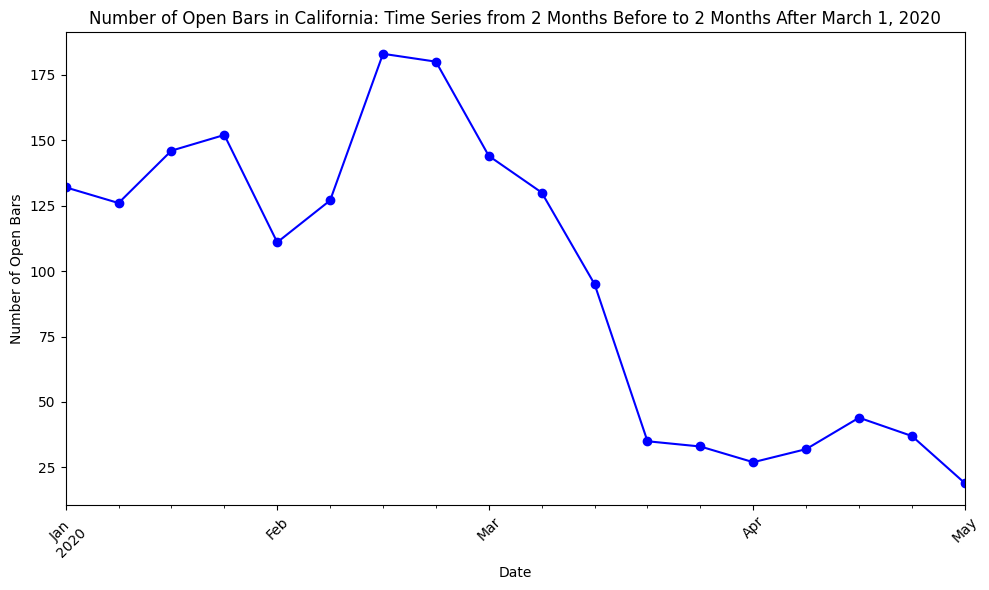

In [ ]:
# Convert review date to datetime
review["date"] = pd.to_datetime(review["date"])

# Filter reviews for the entire period
filtered_reviews = review[(review["date"] >= "2019-11-01")]

# Merge review data with business data
merged_data = pd.merge(filtered_reviews, business_ca, on="business_id", how="inner")

# Define the start of the pandemic and the 2 months before and after
pandemic_start_date = pd.to_datetime("2020-03-01")
before_pandemic_date = pandemic_start_date - pd.Timedelta(days=60)  # 2 months before
after_pandemic_date = pandemic_start_date + pd.Timedelta(days=60)  # 2 months after

# Filter the data to include only the days before and after March 1, 2020
filtered_data = merged_data[(merged_data["date"] >= before_pandemic_date) & (merged_data["date"] <= after_pandemic_date)]

# Only include open bars
open_bars = filtered_data[filtered_data["is_open"] == 1]

# Group by week and count the number of open bars each week
open_bars_per_week = open_bars.groupby(pd.Grouper(key='date', freq='W')).size()

# Plot the time series data
plt.figure(figsize=(10, 6))
open_bars_per_week.plot(kind='line', marker='o', color='b')

# Set the title and labels
plt.title('Number of Open Bars in California: Time Series from 2 Months Before to 2 Months After March 1, 2020')
plt.xlabel('Date')
plt.ylabel('Number of Open Bars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
business['is_open'] = business['is_open'].astype(bool)
target_categories = ["Bars"]
filtered_business = business[
    (business["state"] == "CA") &
    (business["is_open"] == True) &
    (business["categories"].str.contains("Restaurants", na=False, case=False)) &
    (business["categories"].str.contains("|".join(target_categories), na=False, case=False))
]
filtered_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
141,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,True,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
3339,_v3DcLatG70adfYzWTd-CQ,Pacific Health Foods,944 Linden Ave,Carpinteria,CA,93013,34.398436,-119.518794,4.5,97,True,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Sandwiches, Specialty Food, Food, Health Marke...","{'Monday': '9:0-18:30', 'Tuesday': '9:0-18:30'..."
4407,1FURjeGJi_LBXcJQg8eskw,Padaro Beach Grill,3765 Santa Claus Ln,Carpinteria,CA,93013,34.406833,-119.548583,4.5,885,True,"{'GoodForKids': 'True', 'RestaurantsGoodForGro...","American (Traditional), Restaurants, Seafood, ...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-19:30',..."
4724,sxuv5uZU15UHGT_HB1xYxQ,Islands Restaurant,3825 State St,Santa Barbara,CA,93105,34.438119,-119.748456,3.5,197,True,"{'BusinessAcceptsCreditCards': 'True', 'Music'...","Bars, Burgers, Restaurants, Nightlife, Sports ...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
5247,vC2qm1y3Au5czBtbhc-DNw,Sushi Teri,970 Linden Ave,Carpinteria,CA,93013,34.398527,-119.518475,3.0,167,True,"{'RestaurantsReservations': 'True', 'NoiseLeve...","Restaurants, Sushi Bars","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."


In [ ]:
filtered_business.shape

(168, 14)

In [ ]:
review['date'] = pd.to_datetime(review['date'])
filtered_reviews = review[(review['date'] >= '2020-03-01') & (review['date'] <= '2020-12-31')]
filtered_reviews = filtered_reviews[filtered_reviews['business_id'].isin(filtered_business['business_id'])]
filtered_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
290535,Z44AVfLHEztjNk-OdFLBxw,DG6HxjEbt4_jOeePS_LbZQ,-3AooxIkg38UyUdlz5oXdw,5.0,0.0,0.0,0.0,We had a wonderful dinner tonight at Chase!\nE...,2020-03-06 04:20:48
304798,Pzr2ZzHe1hP2S2WEUZcoxg,i2tfXo2lsct-768xII22WA,zbrIMldF_O1ZQ0vpUaaa8A,2.0,1.0,1.0,0.0,I wasn't that impressed with this place. We t...,2020-04-20 20:50:09
323774,4km4Y4QhOZA92fZXrYgLeA,Rvi4jCGpNmhpfPGiaWrRKQ,zbrIMldF_O1ZQ0vpUaaa8A,3.0,0.0,0.0,0.0,Very nice servers and staff. The food was very...,2020-06-28 01:08:20
336079,hyqrWgo7Unhm-e0aH8XWig,l33MmSgi6e2h8jdN5rYyFQ,34Eqv8jXgxg_EEwcsNgeeg,1.0,0.0,2.0,0.0,I got a Island bowl and they made it bad. They...,2020-05-08 18:11:35
338963,h8PMxRveWvGum0xeeRFobg,IOJ4Nj3Zz2wVz7WUMJz-_w,1FURjeGJi_LBXcJQg8eskw,5.0,0.0,0.0,0.0,Had an excellent lunch from here (Takeaway) I ...,2020-10-10 21:50:44


In [ ]:
filtered_reviews.shape

(4424, 9)

Remove 3 star reviews from the input data, create a new column - Sentiment for the remaining reviews. For reviews with 1 or 2 star rating, set the value in the Sentiment column to 0. For reviews with 4 or 5 star rating, set the value in the sentiment column to 1.

In [ ]:
# Remove 3-star review
filtered_reviews = filtered_reviews[filtered_reviews["stars"] != 3]

# Create sentiment column
filtered_reviews["Sentiment"] = filtered_reviews["stars"].apply(lambda x: 0 if x <= 2 else 1)
filtered_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Sentiment
290535,Z44AVfLHEztjNk-OdFLBxw,DG6HxjEbt4_jOeePS_LbZQ,-3AooxIkg38UyUdlz5oXdw,5.0,0.0,0.0,0.0,We had a wonderful dinner tonight at Chase!\nE...,2020-03-06 04:20:48,1
304798,Pzr2ZzHe1hP2S2WEUZcoxg,i2tfXo2lsct-768xII22WA,zbrIMldF_O1ZQ0vpUaaa8A,2.0,1.0,1.0,0.0,I wasn't that impressed with this place. We t...,2020-04-20 20:50:09,0
336079,hyqrWgo7Unhm-e0aH8XWig,l33MmSgi6e2h8jdN5rYyFQ,34Eqv8jXgxg_EEwcsNgeeg,1.0,0.0,2.0,0.0,I got a Island bowl and they made it bad. They...,2020-05-08 18:11:35,0
338963,h8PMxRveWvGum0xeeRFobg,IOJ4Nj3Zz2wVz7WUMJz-_w,1FURjeGJi_LBXcJQg8eskw,5.0,0.0,0.0,0.0,Had an excellent lunch from here (Takeaway) I ...,2020-10-10 21:50:44,1
353136,51sAqJ4FZ0dklfF-04kH9A,O3qNc8WUCJZUr7eAtZIg8w,SZU9c8V2GuREDN5KgyHFJw,4.0,0.0,0.0,0.0,Expect to wait as this place is popular! Food...,2020-11-28 04:03:37,1


In [ ]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser", "textcat"])  # Disable components we don't need

# Define a function to process a single review
def normalize_single_review(doc, lowercase=True, remove_stopwords=True):
    lemmatized = []
    for token in doc:
        lemma = token.lemma_.lower() if lowercase else token.lemma_
        if not remove_stopwords or (remove_stopwords and not token.is_stop):
            lemmatized.append(lemma)
    return " ".join(lemmatized)

# Process the dataset in chunks
def process_in_chunks(df, chunk_size=1000, batch_size=500, lowercase=True, remove_stopwords=True):
    results = []

    for i in tqdm(range(0, len(df), chunk_size)):  # Loop through the dataset in chunks
        chunk = df['text'].iloc[i:i+chunk_size].tolist()

        # Process each chunk using spaCy's pipe for efficiency
        processed_chunk = []
        for doc in nlp.pipe(chunk, batch_size=batch_size, n_process=1):  # Use a limited number of processes
            processed_chunk.append(normalize_single_review(doc, lowercase=lowercase, remove_stopwords=remove_stopwords))

        results.extend(processed_chunk)  # Add the processed chunk to results

    return results

# methods from nltk
# to remove non alphanumeric character
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

# to remove URLs
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# to remove html tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# apply preprocessing steps
filtered_reviews['text'] = filtered_reviews['text'].apply(remove_URL)
print("remove_URL function done")
filtered_reviews['text'] = filtered_reviews['text'].apply(remove_html)
print("remove_html function done")
filtered_reviews['text'] = filtered_reviews['text'].apply(alpha_num)
print("alpha_num function done")
# Apply the chunked processing to the entire dataframe
# df['text'] = df['text'].apply(normalize,lowercase=True, remove_stopwords=True)
filtered_reviews['preview'] = process_in_chunks(filtered_reviews, chunk_size=1000, batch_size=500, lowercase=True, remove_stopwords=True)

# train-test split
label_encoder = LabelEncoder()
label_encoder.fit(filtered_reviews['Sentiment'])
filtered_reviews['labels'] = label_encoder.transform(filtered_reviews['Sentiment'])
train_sentences, test_sentences, train_labels, test_labels = train_test_split(filtered_reviews['preview'], filtered_reviews['labels'], test_size=0.2, random_state=5, stratify=filtered_reviews['labels'])

remove_URL function done
remove_html function done
alpha_num function done


100%|██████████| 5/5 [00:27<00:00,  5.42s/it]


In [ ]:
# Check for missing values in 'text' and 'Sentiment' columns
print("Missing value check:")
print(filtered_reviews[['text', 'Sentiment']].isnull().sum())

# Drop rows with missing values in 'text' or 'Sentiment'
filtered_reviews = filtered_reviews.dropna(subset=['text', 'Sentiment'])
print(f"Dataset size after handling missing values: {filtered_reviews.shape}")

# Check the distribution of positive and negative reviews
sentiment_counts = filtered_reviews['Sentiment'].value_counts()
print("Sentiment label distribution:")
print(sentiment_counts)

# Assuming '0' is negative sentiment, and '1' is positive sentiment
minority_class = filtered_reviews[filtered_reviews['Sentiment'] == 0]
majority_class = filtered_reviews[filtered_reviews['Sentiment'] == 1]

# Undersampling: make the number of positive reviews equal to negative reviews
minority_upsampled = resample(minority_class, replace=True, n_samples=sentiment_counts.max(), random_state=42)
balanced_reviews = pd.concat([majority_class, minority_upsampled])

# Check the sentiment label distribution after balancing
balanced_sentiment_counts = balanced_reviews['Sentiment'].value_counts()
print("Balanced sentiment label distribution:")
print(balanced_sentiment_counts)
filtered_reviews = balanced_reviews

Missing value check:
text         0
Sentiment    0
dtype: int64
Dataset size after handling missing values: (4126, 12)
Sentiment label distribution:
Sentiment
1    3411
0     715
Name: count, dtype: int64
Balanced sentiment label distribution:
Sentiment
1    3411
0    3411
Name: count, dtype: int64


# **EDA - Summary Statistics of the Data**

Provide statistics and/or some plots about the data you selected for course project.

- Summary statistics for reviews

In [ ]:
filtered_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6822 entries, 290535 to 2615523
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    6822 non-null   object        
 1   user_id      6822 non-null   object        
 2   business_id  6822 non-null   object        
 3   stars        6822 non-null   float64       
 4   useful       6822 non-null   float64       
 5   funny        6822 non-null   float64       
 6   cool         6822 non-null   float64       
 7   text         6822 non-null   object        
 8   date         6822 non-null   datetime64[ns]
 9   Sentiment    6822 non-null   int64         
 10  preview      6822 non-null   object        
 11  labels       6822 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 692.9+ KB


In [ ]:
# Number of reviews for the filtered restaurants in CA during Covid-19
num_reviews = len(filtered_reviews)
print(f"Number of reviews: {num_reviews}")

Number of reviews: 6822


In [ ]:
# Total number of tokens for the filtered restaurants in CA during Covid-19
all_reviews_text = " ".join(filtered_reviews['text'].dropna())  # Combine all review texts
tokens = all_reviews_text.split()  # Simple split by spaces
num_tokens = len(tokens)
print(f"Total number of tokens: {num_tokens}")

Total number of tokens: 667784


In [ ]:
# Average review length (in terms of number of words) for the filtered restaurants in CA during Covid-19
review_lengths = filtered_reviews['text'].dropna().apply(lambda x: len(x.split()))
avg_review_length = review_lengths.mean()
print(f"Average review length: {avg_review_length:.2f} words")

Average review length: 97.89 words


In [ ]:
# Number of unique words in reviews for the filtered restaurants in CA during Covid-19
unique_words = set(tokens)
num_unique_words = len(unique_words)
print(f"Number of unique words: {num_unique_words}")

Number of unique words: 17450


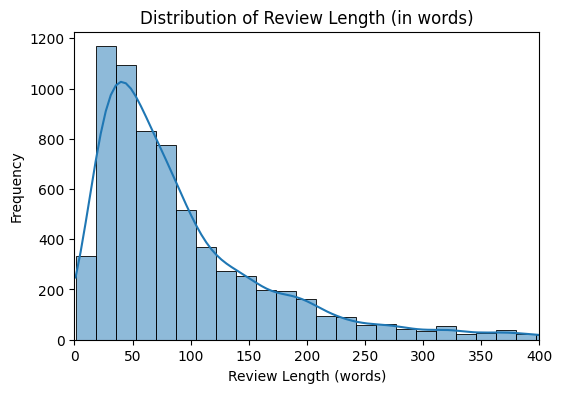

In [ ]:
# Distribution of review length (number of words) in reviews for the filtered restaurants in CA during Covid-19
plt.figure(figsize=(6, 4))
sns.histplot(review_lengths, kde=True, bins=50)
plt.xlim(0, 400)
plt.title('Distribution of Review Length (in words)')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Average stars per review for the filtered restaurants in AZ and CA during Covid-19
avg_stars = filtered_reviews['stars'].mean()
print(f"Average stars per review: {avg_stars:.2f}")

Average stars per review: 3.08


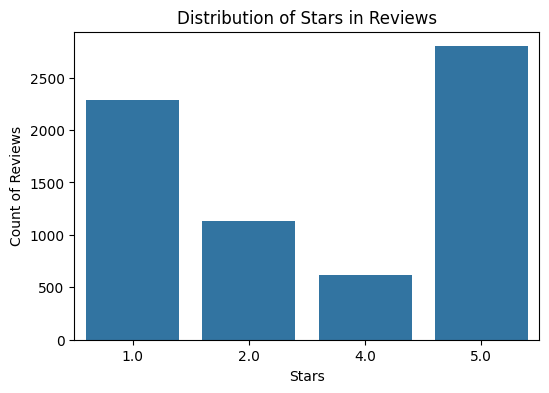

In [ ]:
# Distribution of stars (ratings) for the filtered restaurants in CA during Covid-19 (Exclude 3 star)
plt.figure(figsize=(6, 4))
sns.countplot(data=filtered_reviews, x='stars')
plt.title('Distribution of Stars in Reviews')
plt.xlabel('Stars')
plt.ylabel('Count of Reviews')
plt.show();

In [ ]:
# Average votes per review (useful, funny, cool) for the filtered restaurants in CA during Covid-19
avg_useful = filtered_reviews['useful'].mean()
avg_funny = filtered_reviews['funny'].mean()
avg_cool = filtered_reviews['cool'].mean()
print(f"Average useful votes per review: {avg_useful}")
print(f"Average funny votes per review: {avg_funny}")
print(f"Average cool votes per review: {avg_cool}")

Average useful votes per review: 1.1385224274406331
Average funny votes per review: 0.3015244796247435
Average cool votes per review: 0.4067722075637643


In [ ]:
# Number of unique customers for the filtered restaurants in CA during Covid-19
num_unique_customers = filtered_reviews['user_id'].nunique()
print(f"Number of unique customers: {num_unique_customers}")

Number of unique customers: 3460


In [ ]:
# Number of reviews per filtered business in CA during Covid-19
business_review_counts = filtered_reviews['business_id'].value_counts()
print(f"Number of reviews per business: {business_review_counts}")

Number of reviews per business: business_id
SZU9c8V2GuREDN5KgyHFJw    336
EZc2myE2mYk2h9JK9qu8gw    235
3Wy21heeDm8h2tSZfcj6OA    206
Y57sylYCgq2VQJuBCnjPfA    200
0ac5lGA_0wdKDnib3y59Xg    186
                         ... 
XXsofYxziipczzc3OFDD5Q      4
R93mEcQ1pjq7q3LzShi3ow      3
UBK6zb5-XUETfVzYkRTj1Q      3
fqStx0SvwMFChX_HIdUeEQ      1
AmAc0eD6lyVyb7QdOAO1Mg      1
Name: count, Length: 153, dtype: int64


In [ ]:
# Average number of reviews per filtered business in CA during Covid-19
num_unique_businesses = filtered_business['business_id'].nunique()
print(f"Average of reviews per business: {business_review_counts.sum()/num_unique_businesses}")

Average of reviews per business: 40.607142857142854


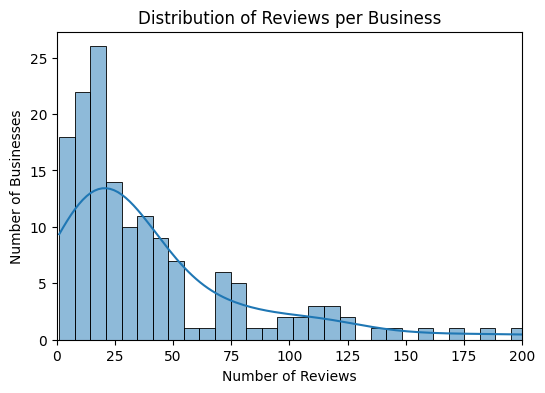

In [ ]:
# Distribution of businesses (number of reviews per business) in CA during Covid-19
plt.figure(figsize=(6, 4))
sns.histplot(business_review_counts, kde=True, bins=50)
plt.xlim(0, 200)
plt.title('Distribution of Reviews per Business')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Businesses')
plt.show()

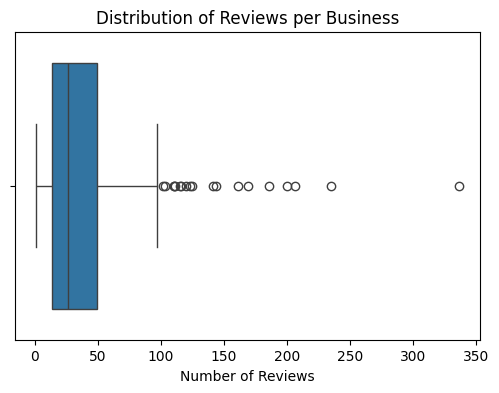

business_id
SZU9c8V2GuREDN5KgyHFJw    336
EZc2myE2mYk2h9JK9qu8gw    235
3Wy21heeDm8h2tSZfcj6OA    206
Y57sylYCgq2VQJuBCnjPfA    200
0ac5lGA_0wdKDnib3y59Xg    186
zbrIMldF_O1ZQ0vpUaaa8A    169
-3AooxIkg38UyUdlz5oXdw    161
ycbmvmBYk4w_ZmdrPL0tBQ    144
8Vo6LN9gqULhXzoxj5k6kQ    141
thlyktt2c7v1DyOpSVSibw    125
tf6S06LD09IFDHUpOPqPaw    123
1FURjeGJi_LBXcJQg8eskw    120
U3grYFIeu6RgAAQgdriHww    116
Qkg16mN-8QR66gjzg6gMyw    115
FpNhzu3w0XgyedhOLDuK8g    111
KSYONgGtrK0nKXfroB-bwg    110
uZYBF0YTU_iKq4_L_PDtMQ    110
uPaVoR6XHk12KT9KTr1WFw    103
r2IhvKZQ_wLR5mLBnPOilg    102
Name: count, dtype: int64


In [ ]:
# Identify High-Review Outliers in CA during Covid-19
plt.figure(figsize=(6, 4))
sns.boxplot(x=business_review_counts)
plt.title('Distribution of Reviews per Business')
plt.xlabel('Number of Reviews')
plt.show()
Q1 = business_review_counts.quantile(0.25)
Q3 = business_review_counts.quantile(0.75)
IQR = Q3 - Q1
outliers = business_review_counts[business_review_counts > (Q3 + 1.5 * IQR)]
print(outliers)

          word  count
5097      food   4559
11071  service   2797
5690     great   2615
5570      good   2538
9333     place   2432
6845      just   2182
12668     time   1933
7220      like   1881
8693   ordered   1826
8688     order   1738


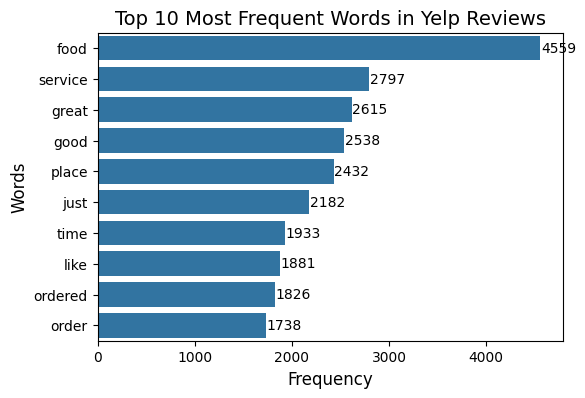

In [ ]:
if 'text' in filtered_reviews.columns:
    vectorizer = CountVectorizer(stop_words='english')
    word_matrix = vectorizer.fit_transform(filtered_reviews['text'])
    word_counts = word_matrix.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    word_freq = pd.DataFrame({'word': vocab, 'count': word_counts})
    word_freq = word_freq.sort_values(by='count', ascending=False)
    # Top 10
    print(word_freq.head(10))
else:
    print("Error: 'text' column not found in filtered_reviews")

top_words = word_freq.head(10)
plt.figure(figsize=(6, 4))
sns.barplot(x=top_words['count'], y=top_words['word'])
plt.title("Top 10 Most Frequent Words in Yelp Reviews", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Words", fontsize=12)
for index, value in enumerate(top_words['count']):
    plt.text(value + 5, index, str(value), va='center', fontsize=10)
plt.show()

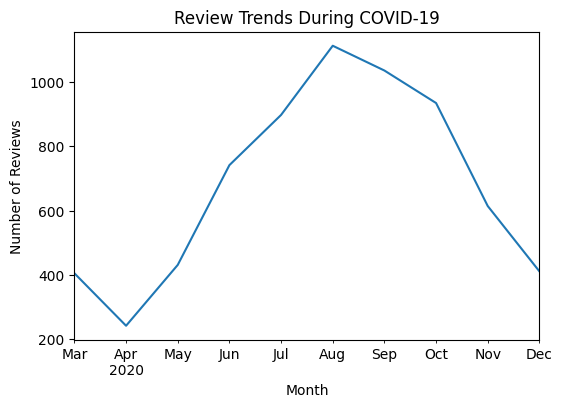

In [ ]:
filtered_reviews['month'] = filtered_reviews['date'].dt.to_period('M')
review_trends = filtered_reviews.groupby('month').size()
review_trends.plot(kind='line', figsize=(6, 4), title="Review Trends During COVID-19")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.show()

- Summary statistics for business

In [ ]:
filtered_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 141 to 149493
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   168 non-null    object 
 1   name          168 non-null    object 
 2   address       168 non-null    object 
 3   city          168 non-null    object 
 4   state         168 non-null    object 
 5   postal_code   168 non-null    object 
 6   latitude      168 non-null    float64
 7   longitude     168 non-null    float64
 8   stars         168 non-null    float64
 9   review_count  168 non-null    int64  
 10  is_open       168 non-null    bool   
 11  attributes    168 non-null    object 
 12  categories    168 non-null    object 
 13  hours         164 non-null    object 
dtypes: bool(1), float64(3), int64(1), object(9)
memory usage: 18.5+ KB


In [ ]:
# Number of unique filtered restaurants open in CA during Covid-19
num_unique_businesses = filtered_business['business_id'].nunique()
print(f"Number of unique bars open in CA during Covid-19: {num_unique_businesses}")

Number of unique bars open in CA during Covid-19: 168


# **Data Evaluation**

## Why the selected data
1. Why this dataset

  The chosen dataset, which includes company attributes, COVID-19-related information, and Yelp reviews, is well-suited for addressing key business inquiries.
- Review data: Sentiment analysis relies on direct customer feedback, which Yelp reviews provide comprehensively.
- Business attributes: Help in understanding operational adjustments, such as the adoption of delivery services and outdoor dining.
- COVID-19 data: Include regional case trends and policy restrictions, contextualizes variations in business performance.

2. Why Focus on California

  California was one of the most affected states during the COVID-19 pandemic, with strict lockdowns and policy changes impacting the restaurant industry. The state also has a diverse and competitive dining scene, making it an ideal setting to study business resilience and consumer adaptation.

3. Why the Pandemic Period

  The pandemic brought unprecedented challenges to businesses, forcing them to adjust their operations rapidly. Studying this period helps identify key strategies for resilience and recovery, providing valuable insights for future crisis management in the restaurant industry.

4. Why Bars

  Bars – Given the nature of their services and the evolving public health guidelines, it’s possible that bars encountered specific challenges that influenced both customer engagement and operational adjustments.

## Whether the sample size is appropriate, and why

The dataset focuses exclusively on bars in California during the COVID-19 pandemic. Initially, it contained 150,346 businesses, 6,990,282 reviews. After filtering, the final dataset includes:
- Number of reviews: 6822
- Average review length: 97.89 words
- Number of unique words: 17450
- Average rating per review: 3.08 stars (Exclude 3-stars)
- Average votes per review:
  - Useful: 1.1
  - Funny: 0.3
  - Cool: 0.4
- Number of unique customers: 3460
- Number of unique filtered restaurants (open during COVID-19): 168

The dataset provides a rich foundation for sentiment analysis, supported by substantial textual content and engagement metrics. The frequency of key terms like food, great, good, place, and service highlights the central themes in customer feedback. While some biases (e.g., industry-specific focus) remain, the dataset’s scope ensures meaningful trend analysis and statistically sound conclusions.

## Whether the selected data could be biased in certain dimension in your analysis.
**1. Industry Bias:**
    
- The dataset focuses only on bars excluding other restaurant types. This industry-specific scope may limit the generalizability of findings to the broader restaurant sector.

**2. Regional Bias:**

- Yelp users are usually more active in urban areas, meaning restaurants in metropolitan regions may be overrepresented compared to rural counterparts. This could skew insights regarding consumer sentiment and business survival rates.

**3. User Bias (Active vs. Inactive Users):**
    
- Reviews are primarily contributed by highly engaged users, who may express more extreme opinions (either very positive or very negative). Occasional customers with neutral experiences are likely underrepresented, leading to potential self-selection bias.

**4. Temporal Bias:**
    
- Review distribution may spike during key pandemic events (e.g., lockdowns, reopenings), rather than being evenly spread over time. This could distort sentiment trends and misrepresent long-term consumer behavior.




## The potential challenges to process the data
- **Noise in Text Data:**

  Yelp reviews may contain slang, abbreviations, emojis, and mixed languages, complicating sentiment analysis and keyword extraction.

- **Data Imbalance:**

  Some newer or less popular restaurants have fewer reviews, limiting the ability to assess their performance reliably.

- **Matching External Data:**

  Aligning Yelp reviews with COVID-19 case trends and policy changes requires careful time-series synchronization to ensure meaningful insights.

- **Handling Missing or Incomplete Data:**

  Some businesses lack detailed attributes, requiring either imputation methods or exclusion from specific analyses.

# **Preliminary Data Exploration**

Apply text processing techniques to your project data to understand the major themes and **briefly comment on the results**.

**A. Customer Reviews Text Analysis:**

In [ ]:
# The default n_neighbors values for UMAP is 15.
# n_neighbors=15 means that the local neighborhood size for UMAP is 15. This is the parameter that controls the local versus global structure in data.
# n_components=5 indicates that the target dimension from UMAP is 5. This is the dimension of data that will be passed into the clustering model.

# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
          n_components=5,
          min_dist=0.0,
          metric='cosine',
          random_state=100)
# Initiate BERTopic
model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
review_topics, probabilities = model.fit_transform(filtered_reviews.text)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
review_topics[:5]

[-1, -1, 151, 5, 11]

In [ ]:
probabilities[:5]

array([[6.95096006e-003, 1.13863734e-003, 3.98603832e-003,
        5.34337332e-003, 2.56881750e-003, 5.11247105e-003,
        9.74530795e-003, 2.69590240e-002, 1.13764497e-002,
        1.15622447e-003, 7.91021332e-003, 3.34029911e-003,
        6.44566254e-004, 6.59183950e-003, 2.20984908e-003,
        5.45878761e-003, 1.22242502e-003, 1.22411060e-002,
        4.97967639e-003, 4.85658121e-004, 5.18571597e-004,
        5.35552779e-004, 3.42007933e-003, 1.02555860e-003,
        4.90577981e-004, 5.40896954e-004, 1.32890582e-002,
        5.51909240e-004, 1.08645696e-002, 1.42266019e-002,
        2.68228286e-003, 5.50682755e-004, 1.89546608e-003,
        2.10099027e-003, 2.49520719e-003, 5.38682605e-004,
        2.82044398e-003, 6.94189602e-004, 1.09202947e-003,
        2.53202273e-003, 4.62331800e-003, 6.42187999e-004,
        6.03796957e-004, 4.89409669e-004, 1.08535022e-002,
        5.29567891e-004, 6.59917020e-004, 1.44955738e-003,
        1.78976736e-002, 5.43415318e-004, 2.46617911e-00

In [ ]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2148,-1_the_great_and_was,"[the, great, and, was, with, food, good, of, i...",[We were super disappointed by Bibi Ji We coul...
1,0,299,0_santa_barbara_in_is,"[santa, barbara, in, is, amazing, great, place...",[Hands down one of the BEST restaurants we hav...
2,1,188,1_sushi_roll_rolls_best,"[sushi, roll, rolls, best, is, barbara, santa,...",[So I yelped best sushi in Santa Barbara and t...
3,2,135,2_tacos_taco_asada_salsa,"[tacos, taco, asada, salsa, poke, tortillas, f...",[Amazing tacos Walked over here because it was...
4,3,74,3_vegan_vegetarian_options_veggie,"[vegan, vegetarian, options, veggie, wrap, fat...",[Visited Santa Barbara 2 weeks ago I follow a ...
...,...,...,...,...,...
186,185,11,185_japanese_problem_near_box,"[japanese, problem, near, box, heater, noticed...",[Last night my partner and I were really cravi...
187,186,11,186_costumer_consideration_shout_previous,"[costumer, consideration, shout, previous, wor...",[This place needs to work on costumer service ...
188,187,11,187_chkn_smalllll_jan_chicken,"[chkn, smalllll, jan, chicken, desire, uber, e...",[came here on jan 12 2020 food was bland and s...
189,188,11,188_mask_his_bartender_crocodile,"[mask, his, bartender, crocodile, photos, seri...",[VIOLATING COVID 19 RESTRICTIONS please see ph...


In [ ]:
model.get_document_info(filtered_reviews.text)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,We had a wonderful dinner tonight at ChaseEven...,-1,-1_the_great_and_was,"[the, great, and, was, with, food, good, of, i...",[We were super disappointed by Bibi Ji We coul...,the - great - and - was - with - food - good -...,0.351400,False
1,Had an excellent lunch from here Takeaway I or...,-1,-1_the_great_and_was,"[the, great, and, was, with, food, good, of, i...",[We were super disappointed by Bibi Ji We coul...,the - great - and - was - with - food - good -...,0.596733,False
2,Expect to wait as this place is popular Food ...,151,151_cabbage_toasted_seasoning_unseasoned,"[cabbage, toasted, seasoning, unseasoned, sore...",[Overpriced food All of the food was cold The ...,cabbage - toasted - seasoning - unseasoned - s...,0.000904,False
3,I live in SF and the cioppino they have here i...,5,5_crab_uni_lobster_seafood,"[crab, uni, lobster, seafood, fresh, pier, cho...",[Santa Barbara Shellfish Company is a restaura...,crab - uni - lobster - seafood - fresh - pier ...,1.000000,False
4,All around fantastic and some of the beat smoo...,11,11_smoothie_blenders_smoothies_juice,"[smoothie, blenders, smoothies, juice, jamba, ...",[I stopped in here for a quick smoothie WOW Wa...,smoothie - blenders - smoothies - juice - jamb...,0.024130,False
...,...,...,...,...,...,...,...,...
6817,Wow I rarely take the time to write reviews bu...,9,9_patrons_management_tables_rag,"[patrons, management, tables, rag, distancing,...",[Bad day We have loved the Honor Bar since Da...,patrons - management - tables - rag - distanci...,0.071790,False
6818,I have been to a few different Honor Bar locat...,25,25_line_few_honor_once,"[line, few, honor, once, walked, tables, menus...",[I was excited to try this fairly new restaura...,line - few - honor - once - walked - tables - ...,1.000000,False
6819,Our visit was not that great Our steak was Bur...,-1,-1_the_great_and_was,"[the, great, and, was, with, food, good, of, i...",[We were super disappointed by Bibi Ji We coul...,the - great - and - was - with - food - good -...,0.706071,False
6820,This is my husband and Is favorite Italian foo...,117,117_enforce_sharon_rule_sandbar,"[enforce, sharon, rule, sandbar, waitress, us,...",[Usually I love sandbar but last night we had ...,enforce - sharon - rule - sandbar - waitress -...,1.000000,False


In [ ]:
# Visualize the most relevant 10 words for the top 5 topics
fig = model.visualize_barchart(top_n_topics=5,n_words=10,height = 500)
# Display the figure explicitly
fig.show()

In [ ]:
filtered_reviews['topic'] = review_topics
filtered_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Sentiment,preview,labels,month,topic
290535,Z44AVfLHEztjNk-OdFLBxw,DG6HxjEbt4_jOeePS_LbZQ,-3AooxIkg38UyUdlz5oXdw,5.0,0.0,0.0,0.0,We had a wonderful dinner tonight at ChaseEven...,2020-03-06 04:20:48,1,wonderful dinner tonight chaseeven restaurant ...,1,2020-03,-1
338963,h8PMxRveWvGum0xeeRFobg,IOJ4Nj3Zz2wVz7WUMJz-_w,1FURjeGJi_LBXcJQg8eskw,5.0,0.0,0.0,0.0,Had an excellent lunch from here Takeaway I or...,2020-10-10 21:50:44,1,excellent lunch takeaway order grill fish taco...,1,2020-10,-1
353136,51sAqJ4FZ0dklfF-04kH9A,O3qNc8WUCJZUr7eAtZIg8w,SZU9c8V2GuREDN5KgyHFJw,4.0,0.0,0.0,0.0,Expect to wait as this place is popular Food ...,2020-11-28 04:03:37,1,expect wait place popular food good good val...,1,2020-11,151
354896,upoFWk-vKkWQ_xq2argCow,SclojOp5SlNVQRhqCLHiOg,SZU9c8V2GuREDN5KgyHFJw,5.0,0.0,0.0,0.0,I live in SF and the cioppino they have here i...,2020-10-11 06:19:11,1,live sf cioppino way well ve try north enjoy u...,1,2020-10,5
355020,JMpGhZXjFStJUgVNow0TQw,8x0RSG6QxfxgW9EfRcb9Wg,34Eqv8jXgxg_EEwcsNgeeg,5.0,0.0,0.0,0.0,All around fantastic and some of the beat smoo...,2020-05-25 17:41:16,1,fantastic beat smoothie bowl strawberry sweet ...,1,2020-05,11


**B. Business Attribute Text Analysis:**

In [ ]:
# Function to clean text by removing "false", "true", and "none"
def clean_text(text):
    # Remove "false", "true", and "none"
    cleaned_text = re.sub(r'\b(false|true|none)\b', '', str(text), flags=re.IGNORECASE)
    # Remove days of the week (case insensitive)
    cleaned_text = re.sub(r'\b(monday|tuesday|wednesday|thursday|friday|saturday|sunday)\b', '', cleaned_text, flags=re.IGNORECASE)
    return ' '.join(cleaned_text.split())  # Remove extra spaces
bert_business = filtered_business['attributes'].astype(str).fillna('').apply(clean_text)

# Initiate UMAP
umap_model = UMAP(n_neighbors=5,
          n_components=5,
          min_dist=0.0,
          metric='cosine',
          random_state=100)
# Initiate BERTopic
model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)

# Run BERTopic model
attribute_topics, probabilities = model.fit_transform(bert_business)

In [ ]:
attribute_topics[:5]

[0, 1, 1, 2, 1]

In [ ]:
probabilities[:5]

array([[1.00000000e+000, 1.32297384e-309, 1.36781348e-309],
       [5.95909903e-002, 1.81875545e-001, 1.43655302e-001],
       [4.38373628e-002, 2.98644456e-001, 1.52781383e-001],
       [1.53734931e-309, 3.77783680e-309, 1.00000000e+000],
       [1.62518651e-309, 1.00000000e+000, 3.72041312e-309]])

In [ ]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2,-1_restaurantspricerange2_wifi_businessaccepts...,"[restaurantspricerange2, wifi, businessaccepts...","[{'DogsAllowed': '', 'WiFi': ""u'free'"", 'Busin..."
1,0,84,0_casual_ambience_restaurantsreservations_alcohol,"[casual, ambience, restaurantsreservations, al...","[{'RestaurantsPriceRange2': '2', 'BikeParking'..."
2,1,66,1_bikeparking_businessacceptscreditcards_resta...,"[bikeparking, businessacceptscreditcards, rest...","[{'GoodForKids': '', 'RestaurantsGoodForGroups..."
3,2,16,2_dj_music_nomusic_video,"[dj, music, nomusic, video, backgroundmusic, j...","[{'BusinessAcceptsCreditCards': '', 'Music': ""..."


In [ ]:
model.get_document_info(bert_business)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,"{'OutdoorSeating': '', 'RestaurantsAttire': ""'...",0,0_casual_ambience_restaurantsreservations_alcohol,"[casual, ambience, restaurantsreservations, al...","[{'RestaurantsPriceRange2': '2', 'BikeParking'...",casual - ambience - restaurantsreservations - ...,1.000000,False
1,"{'BikeParking': '', 'BusinessParking': ""{'gara...",1,1_bikeparking_businessacceptscreditcards_resta...,"[bikeparking, businessacceptscreditcards, rest...","[{'GoodForKids': '', 'RestaurantsGoodForGroups...",bikeparking - businessacceptscreditcards - res...,0.181876,False
2,"{'GoodForKids': '', 'RestaurantsGoodForGroups'...",1,1_bikeparking_businessacceptscreditcards_resta...,"[bikeparking, businessacceptscreditcards, rest...","[{'GoodForKids': '', 'RestaurantsGoodForGroups...",bikeparking - businessacceptscreditcards - res...,0.298644,True
3,"{'BusinessAcceptsCreditCards': '', 'Music': ""{...",2,2_dj_music_nomusic_video,"[dj, music, nomusic, video, backgroundmusic, j...","[{'BusinessAcceptsCreditCards': '', 'Music': ""...",dj - music - nomusic - video - backgroundmusic...,1.000000,True
4,"{'RestaurantsReservations': '', 'NoiseLevel': ...",1,1_bikeparking_businessacceptscreditcards_resta...,"[bikeparking, businessacceptscreditcards, rest...","[{'GoodForKids': '', 'RestaurantsGoodForGroups...",bikeparking - businessacceptscreditcards - res...,1.000000,False
...,...,...,...,...,...,...,...,...
163,"{'DriveThru': '', 'RestaurantsAttire': ""u'casu...",0,0_casual_ambience_restaurantsreservations_alcohol,"[casual, ambience, restaurantsreservations, al...","[{'RestaurantsPriceRange2': '2', 'BikeParking'...",casual - ambience - restaurantsreservations - ...,0.900745,False
164,"{'BusinessAcceptsBitcoin': '', 'DogsAllowed': ...",1,1_bikeparking_businessacceptscreditcards_resta...,"[bikeparking, businessacceptscreditcards, rest...","[{'GoodForKids': '', 'RestaurantsGoodForGroups...",bikeparking - businessacceptscreditcards - res...,0.491493,False
165,"{'BusinessAcceptsCreditCards': '', 'DogsAllowe...",2,2_dj_music_nomusic_video,"[dj, music, nomusic, video, backgroundmusic, j...","[{'BusinessAcceptsCreditCards': '', 'Music': ""...",dj - music - nomusic - video - backgroundmusic...,1.000000,False
166,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",0,0_casual_ambience_restaurantsreservations_alcohol,"[casual, ambience, restaurantsreservations, al...","[{'RestaurantsPriceRange2': '2', 'BikeParking'...",casual - ambience - restaurantsreservations - ...,0.918162,False


In [ ]:
# Visualize the most relevant 10 words for the top 5 topics
fig = model.visualize_barchart(top_n_topics=3,n_words=10,height = 500)
# Display the figure explicitly
fig.show()

In [ ]:
filtered_business['attribute_topic'] = attribute_topics
filtered_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_topic
141,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,True,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",0
3339,_v3DcLatG70adfYzWTd-CQ,Pacific Health Foods,944 Linden Ave,Carpinteria,CA,93013,34.398436,-119.518794,4.5,97,True,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Sandwiches, Specialty Food, Food, Health Marke...","{'Monday': '9:0-18:30', 'Tuesday': '9:0-18:30'...",1
4407,1FURjeGJi_LBXcJQg8eskw,Padaro Beach Grill,3765 Santa Claus Ln,Carpinteria,CA,93013,34.406833,-119.548583,4.5,885,True,"{'GoodForKids': 'True', 'RestaurantsGoodForGro...","American (Traditional), Restaurants, Seafood, ...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-19:30',...",1
4724,sxuv5uZU15UHGT_HB1xYxQ,Islands Restaurant,3825 State St,Santa Barbara,CA,93105,34.438119,-119.748456,3.5,197,True,"{'BusinessAcceptsCreditCards': 'True', 'Music'...","Bars, Burgers, Restaurants, Nightlife, Sports ...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",2
5247,vC2qm1y3Au5czBtbhc-DNw,Sushi Teri,970 Linden Ave,Carpinteria,CA,93013,34.398527,-119.518475,3.0,167,True,"{'RestaurantsReservations': 'True', 'NoiseLeve...","Restaurants, Sushi Bars","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",1


Interpret each topic: the theme of each topic

**1. Review:**
- Topic 0: Santa Barbara Experience

  This topic focuses on customer reviews related to their experiences in Santa Barbara, highlighting praise for the city, its ambiance, and the general experience at the restaurants.

- Topic 1: Great Food and Service

  This topic refers to positive customer experiences, focusing on the quality of food, excellent service, and the friendly staff. It's a theme centered around high-quality dining experiences.

- Topic 2: Tacos and Mexican Food

  This topic is centered around Mexican or taco-related dishes. Words like "tacos", "asada", and "carne" indicate a focus on meat-based Mexican cuisine and specific popular dishes.

- Topic 3: Vegan and Vegetarian Options

  This topic highlights customer reviews related to vegan and vegetarian options available at the restaurant. It indicates that there was a significant portion of the customer base seeking plant-based alternatives.

- Topic 4: Seafood and Fresh Ingredients

  This topic focuses on seafood restaurants, especially those offering fresh ingredients like crab, lobster, and clams. It may also indicate a coastal theme with references to seafood dishes typically found at piers.

**2. Business Attribute:**
- Topic 0: Casual and Ambience-Focused Restaurants

  This topic focuses on casual dining experiences where reservations are often not required. It also highlights outdoor seating and alcohol availability, indicating a relaxed dining environment.
- Topic 1: Business Services and Accessibility

  This topic revolves around the operational aspects of the businesses, such as their accessibility (bike parking), payment methods (accepting credit cards), and offering services like takeout and delivery.
- Topic 2: Entertainment-Focused Venues

  This topic centers on businesses that offer entertainment, such as live music, DJs, karaoke, and video projections. It highlights the social and entertainment aspects of these venues.


# **Sentiment Analysis**

**A. Customer Reviews Text Analysis:**

In [ ]:
# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis
filtered_reviews['sentiment_score'] = filtered_reviews['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment based on the compound score
filtered_reviews['sentiment_label'] = filtered_reviews['sentiment_score'].apply(lambda x: 1 if x > 0 else 0)

# 1 = Positive, 0 = Negative
print(filtered_reviews[['text', 'sentiment_score', 'sentiment_label']].head())

                                                     text  sentiment_score  \
290535  We had a wonderful dinner tonight at ChaseEven...           0.9694   
338963  Had an excellent lunch from here Takeaway I or...           0.9805   
353136  Expect to wait as this place is popular  Food ...           0.9601   
354896  I live in SF and the cioppino they have here i...           0.6858   
355020  All around fantastic and some of the beat smoo...           0.5719   

        sentiment_label  
290535                1  
338963                1  
353136                1  
354896                1  
355020                1  


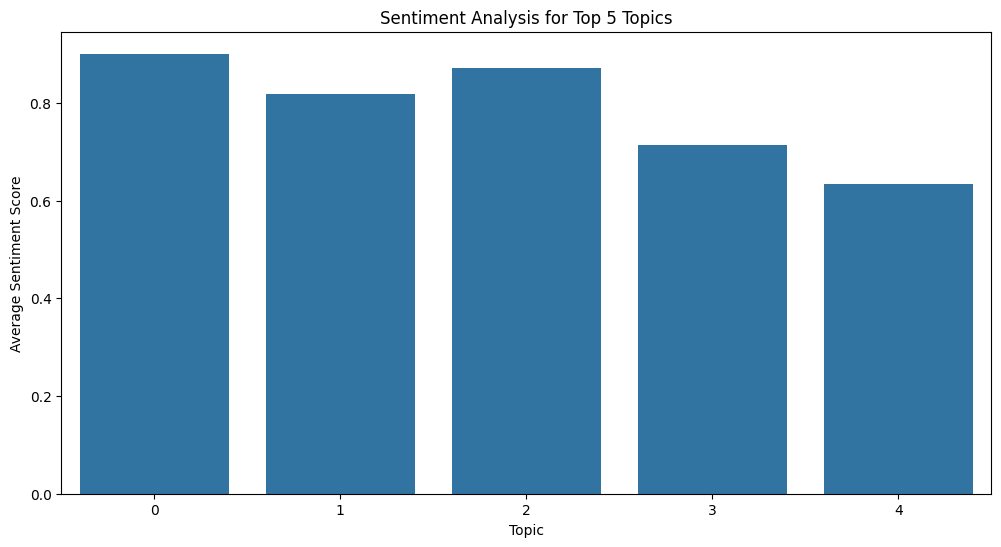

In [ ]:
# Filter the data for the top 5 topics
top_5_topics = filtered_reviews[filtered_reviews['topic'].isin([0, 1, 2, 3, 4])]

# Calculate the average sentiment for each topic
sentiment_by_topic = top_5_topics.groupby(['topic'])['sentiment_score'].mean().reset_index()

# Visualize the average sentiment for each topic
plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_by_topic, x='topic', y='sentiment_score')
plt.title('Sentiment Analysis for Top 5 Topics')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Score')
plt.show()

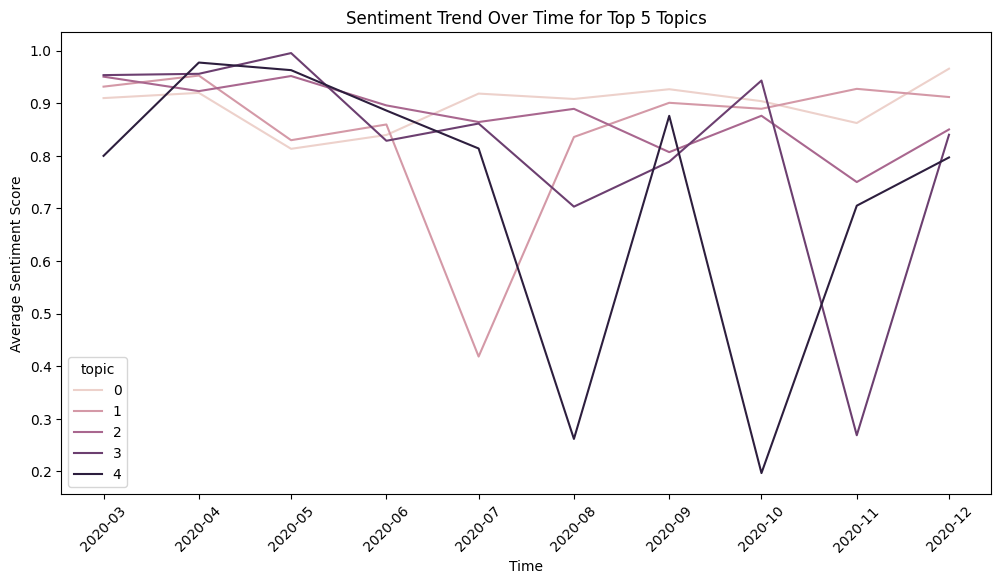

In [ ]:
# Calculate the average sentiment per month for each topic
sentiment_by_month = top_5_topics.groupby(['month', 'topic'])['sentiment_score'].mean().reset_index()

# Convert 'month' column to timestamp for plotting
sentiment_by_month['month'] = sentiment_by_month['month'].dt.to_timestamp()

# Plot the sentiment trend over time for each topic
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_by_month, x='month', y='sentiment_score', hue='topic')
plt.title('Sentiment Trend Over Time for Top 5 Topics')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

**B. Business Attribute Text Analysis:**

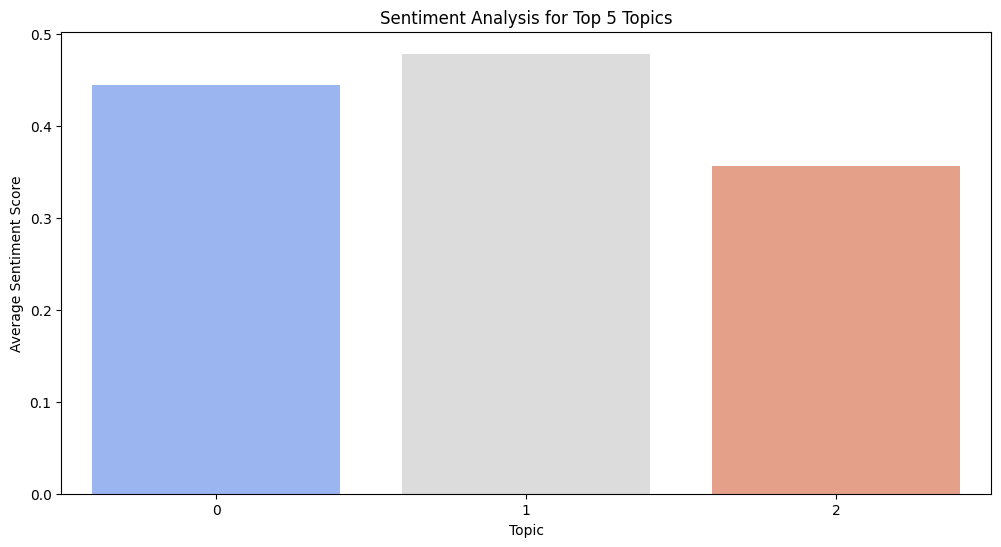

In [ ]:
merged_data = pd.merge(filtered_reviews, filtered_business[['business_id', 'attribute_topic']], on="business_id", how="inner")
top_5_topics = merged_data[merged_data['attribute_topic'].isin([0, 1, 2, 3, 4])]
sentiment_by_topic = top_5_topics.groupby('attribute_topic')['sentiment_score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_by_topic, x='attribute_topic', y='sentiment_score', palette='coolwarm')
plt.title('Sentiment Analysis for Top 5 Topics')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Score')
plt.show()

The highest sentiment score in the topic 1 (Business Services and Accessibility) likely reflects positive customer experiences related to convenient and accessible business services, such as offering bike parking, accepting credit cards, and providing takeout or delivery options. These services improve customer satisfaction by making it easier for customers to access and engage with the business, especially during times when convenience and safety (like contactless payment) are top priorities.

# **Operational Adaptation Analysis**

**A. Check for adaptation-related terms in the 'Attribute' column from busniess dataset**

**Compare Average Star Ratings for Restaurants with and without Delivery Services**

1. More restaurants offer delivery services during COVID-19.
2. The T-test results show a T-statistic of -2.60 and a P-value of 0.010, which is less than the commonly used significance level of 0.05. This indicates that there is a statistically significant difference in the average ratings (stars) between businesses that offer delivery and those that do not. Specifically, businesses with delivery services tend to have a higher average rating compared to those without delivery.

has_delivery
True     160
False      8
Name: count, dtype: int64


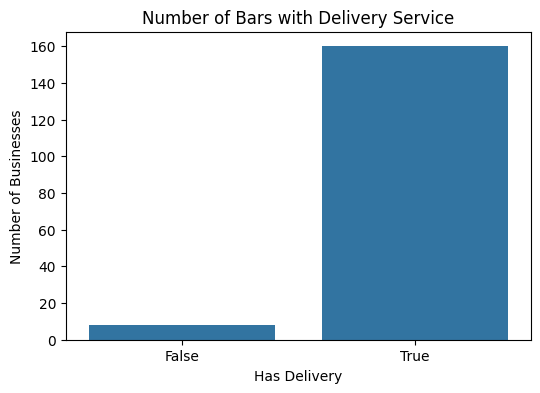

In [ ]:
# Try to look into the top word from the major theme - restaurantsdelivery
# Check the number of the restaurants with delivery service
filtered_business['has_delivery'] = filtered_business['attributes'].str.contains('delivery', case=False, na=False)
print(filtered_business['has_delivery'].value_counts())

plt.figure(figsize=(6, 4))
sns.barplot(x=filtered_business['has_delivery'].value_counts().index,
            y=filtered_business['has_delivery'].value_counts().values)
plt.title("Number of Bars with Delivery Service")
plt.xlabel("Has Delivery")
plt.ylabel("Number of Businesses")
plt.show()

   has_delivery     stars
0         False  3.562500
1          True  4.034375


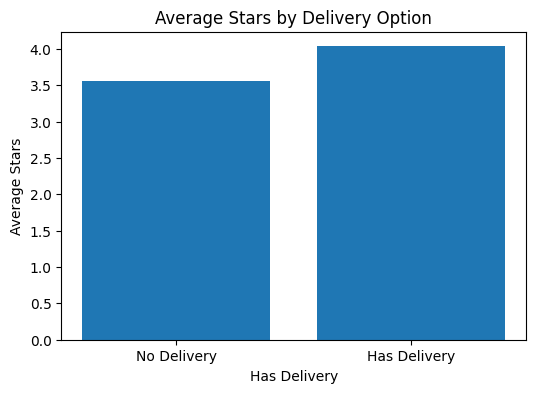

In [ ]:
# Group by 'has_delivery' and calculate average stars
star_stats = filtered_business.groupby('has_delivery')['stars'].mean().reset_index()
print(star_stats)

plt.figure(figsize=(6, 4))
plt.bar(star_stats['has_delivery'].astype(str), star_stats['stars'])
plt.xlabel('Has Delivery')
plt.ylabel('Average Stars')
plt.title('Average Stars by Delivery Option')
plt.xticks([0, 1], ['No Delivery', 'Has Delivery'])
plt.show()

In [ ]:
# Separate the two groups
no_delivery = filtered_business[filtered_business['has_delivery'] == False]['stars']
has_delivery = filtered_business[filtered_business['has_delivery'] == True]['stars']

# Perform T-test
t_stat, p_value = ttest_ind(no_delivery, has_delivery)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -2.5962634733363474
P-value: 0.010269612955059364


**Compare Average Review Count for Restaurants with and without Delivery Services**

- Businesses with delivery options tend to have a significantly higher review count compared to those without. This could suggest that businesses offering delivery are more popular or have a higher customer engagement, as reflected in the number of reviews.
- The T-test results show a T-statistic of -2.09 and a P-value of 0.038, which is less than 0.05. This indicates a statistically significant difference in the number of reviews between businesses that offer delivery and those that do not. Specifically, businesses with delivery services tend to have more reviews than those without.

   has_delivery  review_count
0         False      54.87500
1          True     381.10625


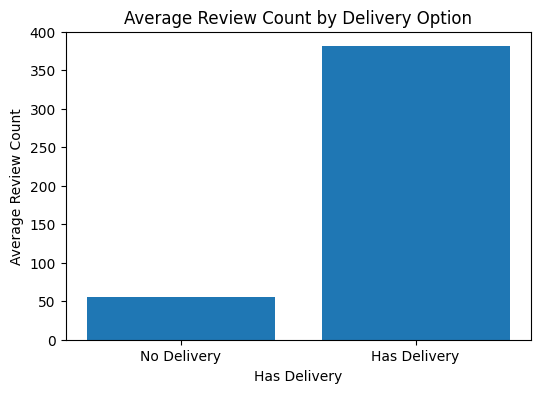

In [ ]:
# Group by 'has_delivery' and calculate average review count
review_stats = filtered_business.groupby('has_delivery')['review_count'].mean().reset_index()
print(review_stats)

plt.figure(figsize=(6, 4))
plt.bar(review_stats['has_delivery'].astype(str), review_stats['review_count'])
plt.xlabel('Has Delivery')
plt.ylabel('Average Review Count')
plt.title('Average Review Count by Delivery Option')
plt.xticks([0, 1], ['No Delivery', 'Has Delivery'])
plt.show()

In [ ]:
# Separate the two groups
no_delivery = filtered_business[filtered_business['has_delivery'] == False]['review_count']
has_delivery = filtered_business[filtered_business['has_delivery'] == True]['review_count']

# Perform T-test
t_stat, p_value = ttest_ind(no_delivery, has_delivery)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -2.089700403802177
P-value: 0.038169285720176964


month
2020-03    3.202469
2020-04    2.987603
2020-05    2.828306
2020-06    2.827260
2020-07    3.055741
2020-08    2.973921
2020-09    3.212560
2020-10    3.082441
2020-11    3.399023
2020-12    3.184915
Freq: M, Name: stars, dtype: float64


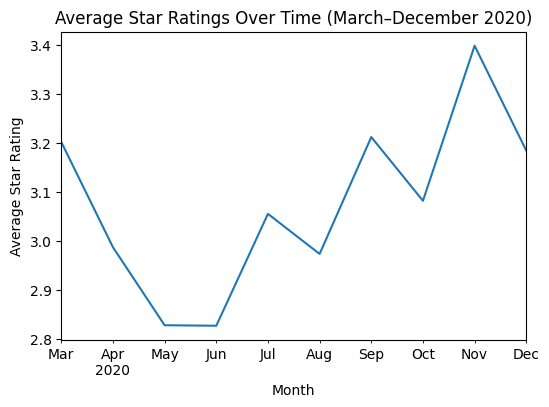

In [ ]:
# Create a 'month' column for the time series analysis
filtered_reviews['month'] = filtered_reviews['date'].dt.to_period('M')

# Calculate the average star ratings per month
monthly_ratings = filtered_reviews.groupby('month')['stars'].mean()
print(monthly_ratings)

# Plot the trend over time
monthly_ratings.plot(kind='line', figsize=(6, 4))
plt.title('Average Star Ratings Over Time (March–December 2020)')
plt.xlabel('Month')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=45)
plt.show()

Based on the trend in the plot and considering the impact of COVID-19, the average star ratings on Yelp appear to fluctuate between March and December 2020, with some noticeable patterns:
- Initial decline in ratings (March–June): In the early months of the pandemic (March to June), there is a general decline in average star ratings, with the lowest point observed in June (4.11). This could be attributed to businesses struggling with operational changes due to COVID-19 restrictions, leading to customer dissatisfaction with service availability, safety measures, and overall experience.

- Recovery and improvement (July–December): From July onwards, the ratings start to improve gradually, reaching a peak in November (4.35). This could reflect businesses adapting to the new normal, implementing safety protocols, and offering services like takeout, delivery, and contactless payments, which may have led to improved customer experiences.

Overall, the trend suggests that while the pandemic initially caused a decline in ratings, businesses began recovering as they adapted to the challenges, resulting in improved customer satisfaction toward the end of the year.

**B. Check for adaptation-related terms in the 'text' column from review**


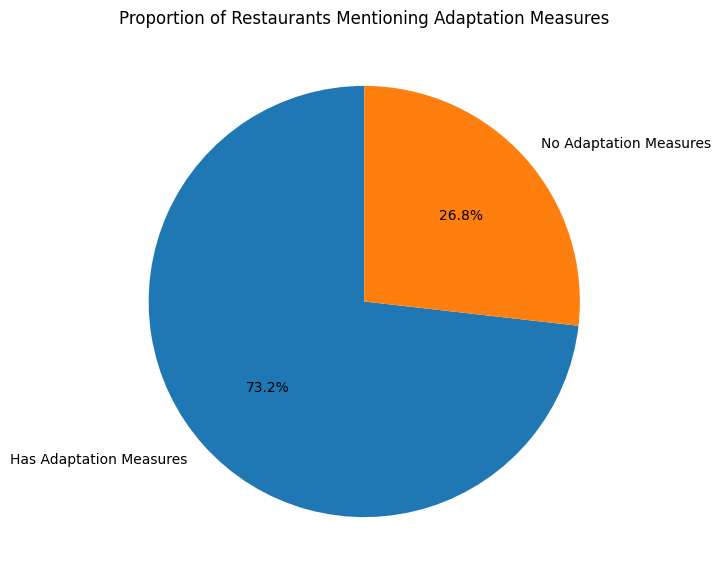

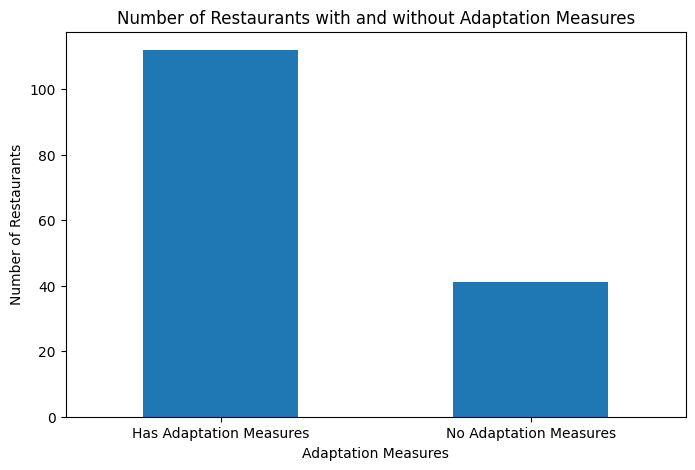

In [ ]:
adaptation_keywords = [
    'touchless', 'pickup', 'contactless', 'delivery', 'takeout', 'social distancing',
    'outdoor seating', 'order online', 'sanitation', 'masks', 'sanitizing',
    'cleaning', 'disinfection', 'curbside', 'contact free', 'mobile ordering',
    'no-contact', 'self-pickup', 'take-away', 'order ahead', 'delivery service'
]


filtered_reviews['has_adaptation'] = filtered_reviews['text'].apply(
    lambda x: any(keyword in str(x).lower() for keyword in adaptation_keywords)
)

restaurant_counts = filtered_reviews.groupby('business_id')['has_adaptation'].any().value_counts()

plt.figure(figsize=(7, 7))
labels = ['Has Adaptation Measures', 'No Adaptation Measures']
plt.pie(restaurant_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Restaurants Mentioning Adaptation Measures")
plt.show()

plt.figure(figsize=(8, 5))
restaurant_counts.plot(kind='bar')
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)
plt.xlabel("Adaptation Measures")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants with and without Adaptation Measures")
plt.show()

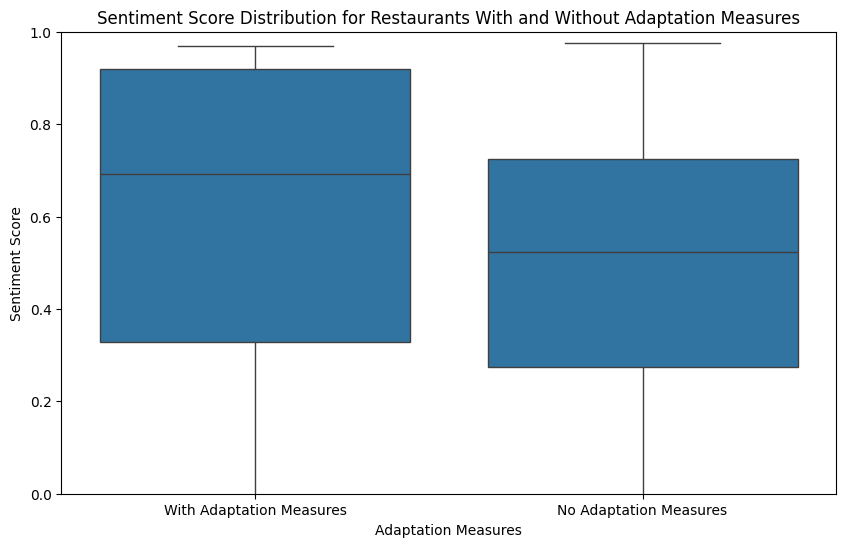

In [ ]:
# Sentiment Score and Adaption
sentiment_data = filtered_reviews.groupby('business_id').agg(
    sentiment_score=('sentiment_score', 'mean'),
    has_adaptation=('has_adaptation', 'max')
).reset_index()


plt.figure(figsize=(10, 6))
sns.boxplot(data=sentiment_data, x="has_adaptation", y="sentiment_score")
plt.xticks(ticks=[1, 0], labels=["With Adaptation Measures", "No Adaptation Measures"])
plt.title("Sentiment Score Distribution for Restaurants With and Without Adaptation Measures")
plt.xlabel("Adaptation Measures")
plt.ylabel("Sentiment Score")
plt.ylim(0, 1)
plt.show()

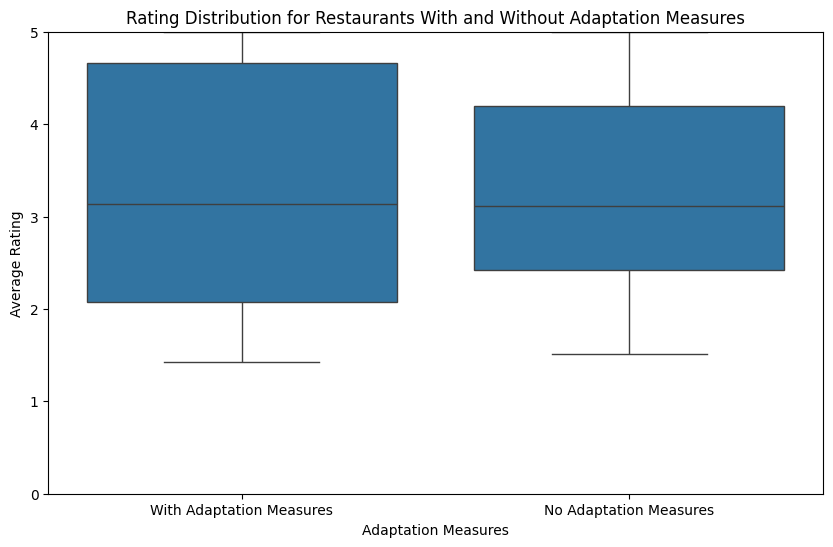

In [ ]:
# Star Rating and Adaption
rating_data = filtered_reviews.groupby('business_id').agg(
    rating=('stars', 'mean'),
    has_adaptation=('has_adaptation', 'max')
).reset_index()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=rating_data, x="has_adaptation", y="rating")
plt.xticks(ticks=[1, 0], labels=["With Adaptation Measures", "No Adaptation Measures"])
plt.title("Rating Distribution for Restaurants With and Without Adaptation Measures")
plt.xlabel("Adaptation Measures")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.show()

<Figure size 1200x600 with 0 Axes>

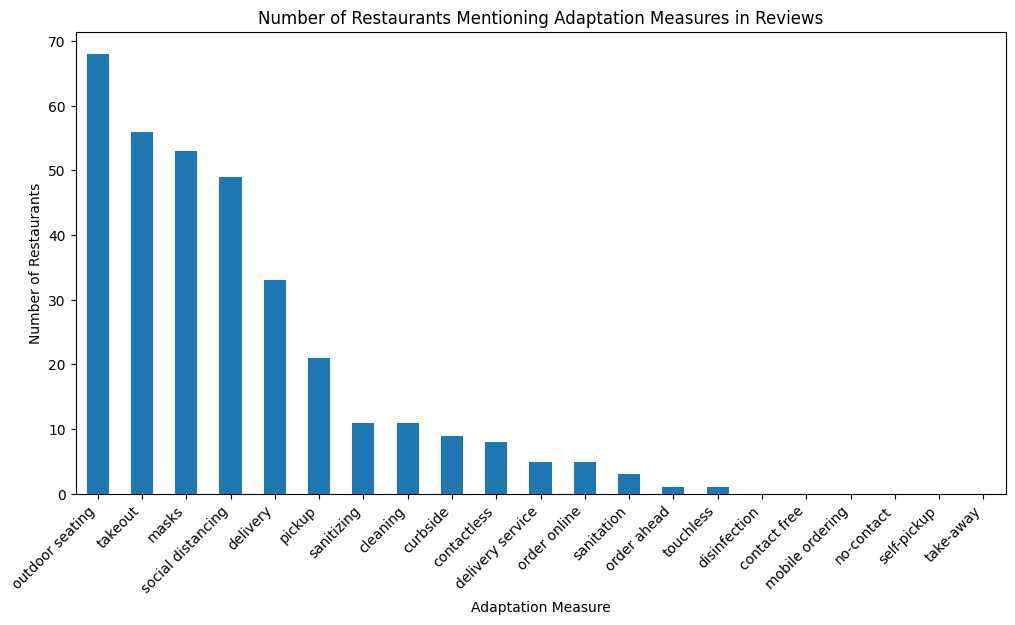

In [ ]:
restaurant_counts = {}
for keyword in adaptation_keywords:
    keyword_mask = merged_data['text'].str.contains(keyword, case=False, na=False)
    restaurant_counts[keyword] = merged_data[keyword_mask]['business_id'].nunique()
adaptation_df = pd.DataFrame(list(restaurant_counts.items()), columns=['Adaptation Measure', 'Restaurant Count'])


plt.figure(figsize=(12, 6))
adaptation_df.sort_values(by="Restaurant Count", ascending=False).plot(
    x="Adaptation Measure", y="Restaurant Count", kind="bar", legend=False, figsize=(12, 6)
)
plt.title("Number of Restaurants Mentioning Adaptation Measures in Reviews")
plt.xlabel("Adaptation Measure")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45, ha="right")
plt.show()

<Figure size 1200x600 with 0 Axes>

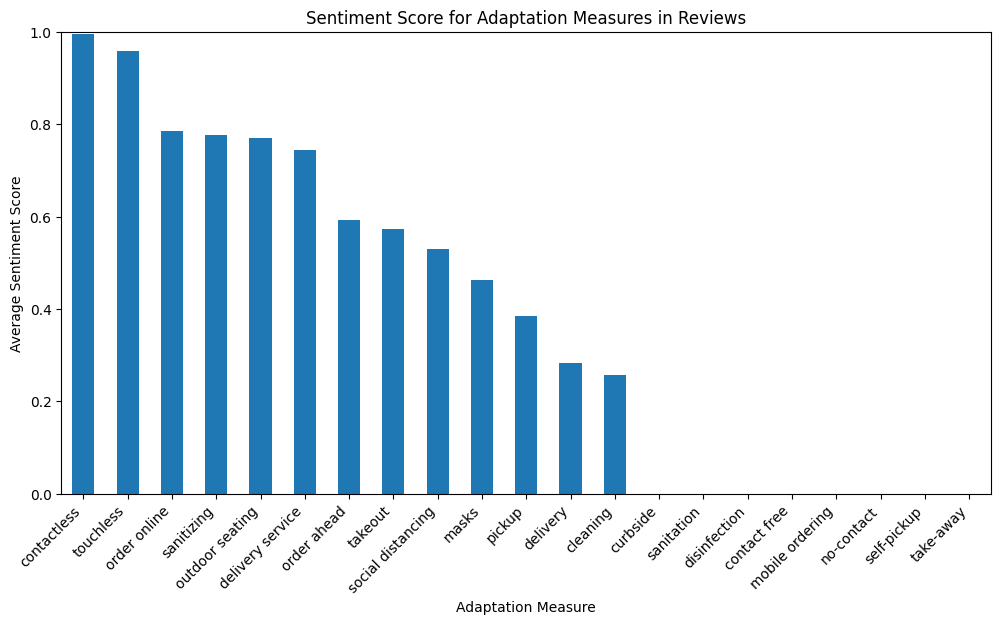

In [ ]:
sentiment_scores = {}

for keyword in adaptation_keywords:
    keyword_mask = filtered_reviews['text'].str.contains(keyword, case=False, na=False)
    sentiment_scores[keyword] = filtered_reviews[keyword_mask]['sentiment_score'].mean()
sentiment_df = pd.DataFrame(list(sentiment_scores.items()), columns=['Adaptation Measure', 'Average Sentiment Score'])

plt.figure(figsize=(12, 6))
sentiment_df.sort_values(by="Average Sentiment Score", ascending=False).plot(
    x="Adaptation Measure", y="Average Sentiment Score", kind="bar", legend=False, figsize=(12, 6)
)
plt.title("Sentiment Score for Adaptation Measures in Reviews")
plt.xlabel("Adaptation Measure")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.show()

In [ ]:
if 'text' in filtered_reviews.columns:
    # Function to extract adaptation-related words
    def extract_adaptation_keywords(text, keywords):
        if isinstance(text, str):  # Ensure text is a string
            return [word for word in text.lower().split() if word in keywords]
        return []
    # Create the 'adaptation_entities' column as lists of adaptation keywords
    filtered_reviews['adaptation_entities'] = filtered_reviews['text'].apply(lambda x: extract_adaptation_keywords(x, adaptation_keywords))

             Coefficient
touchless       0.512811
contactless     0.457990
sanitizing      0.443990
takeout         0.069980
masks           0.021342
pickup         -0.049700
delivery       -0.087479
cleaning       -0.337304
curbside       -0.378230
sanitation     -0.762189


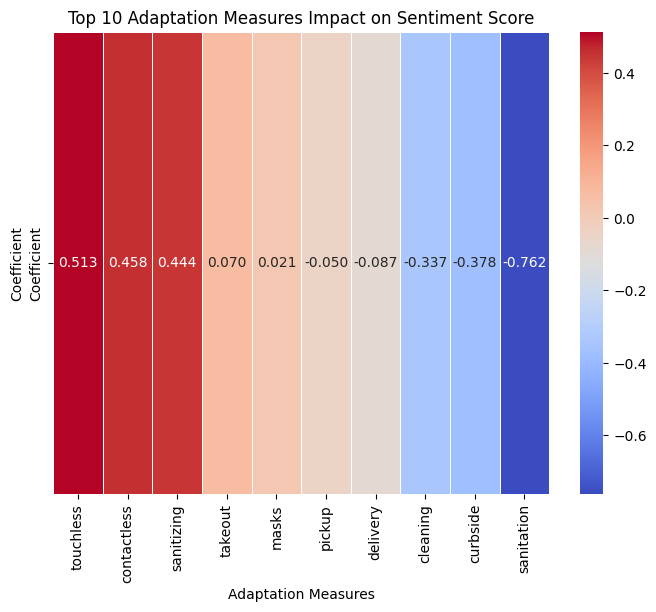

In [ ]:
adaptation_text = [' '.join(entities) for entities in filtered_reviews['adaptation_entities']]
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(adaptation_text)
y = filtered_reviews['sentiment_score']

# Train the model
model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
terms = vectorizer.get_feature_names_out()
coef_df = pd.DataFrame(coefficients, index=terms, columns=['Coefficient'])
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
# Top 10 coefficient adaption
top_coef_df = coef_df.head(10)
print(top_coef_df)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(top_coef_df.T, cmap="coolwarm", annot=True, fmt=".3f", linewidths=0.5, cbar=True)
plt.title("Top 10 Adaptation Measures Impact on Sentiment Score")
plt.xlabel("Adaptation Measures")
plt.ylabel("Coefficient")
plt.show()

1. "Touchless" and "Contactless" services are highly valued.
- Restaurants should promote these options in marketing to attract customers.

2. Cleaning and sanitation discussions tend to be negative.
- Customers may only mention "cleaning" or "sanitation" when they have complaints.
- Restaurants should improve and highlight cleanliness proactively to shift sentiment.

3. Delivery and pickup services have mixed reviews.
- If poorly executed, they could lead to frustration due to delays, fees, or poor food quality.
- Restaurants should optimize delivery logistics and train staff for smoother pickup experiences.

In [ ]:
adapted_restaurants = filtered_reviews[filtered_reviews['has_adaptation'] == True]['stars']
non_adapted_restaurants = filtered_reviews[filtered_reviews['has_adaptation'] == False]['stars']

# Perform T-test
t_stat, p_value = ttest_ind(adapted_restaurants, non_adapted_restaurants)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.5901740690658264
P-value: 0.5550935082904586


In [ ]:
adapted_restaurants = filtered_reviews[filtered_reviews['has_adaptation'] == True]['sentiment_score']
non_adapted_restaurants = filtered_reviews[filtered_reviews['has_adaptation'] == False]['sentiment_score']

# Perform T-test
t_stat, p_value = ttest_ind(adapted_restaurants, non_adapted_restaurants)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 5.14008552291929
P-value: 2.822496078006028e-07


- Star ratings: No significant difference.
  - This indicates no statistically significant difference in the average star ratings between adapted and non-adapted restaurants. Since the p-value (0.56) is much greater than the significance level of 0.05, we fail to reject the null hypothesis.
- Sentiment scores: Significant difference, adapted restaurants have higher sentiment scores than non-adapted ones.
  - There is a statistically significant difference in sentiment scores between adapted and non-adapted restaurants. Since the p-value is much smaller than 0.05, we reject the null hypothesis and conclude that there is a significant difference in sentiment scores.
- While star ratings do not show a significant difference between adapted and non-adapted restaurants, sentiment scores indicate a significant difference, suggesting that adaptation measures are positively influencing customer sentiment, even if not reflected strongly in the ratings.

# **Customer Segmentation**

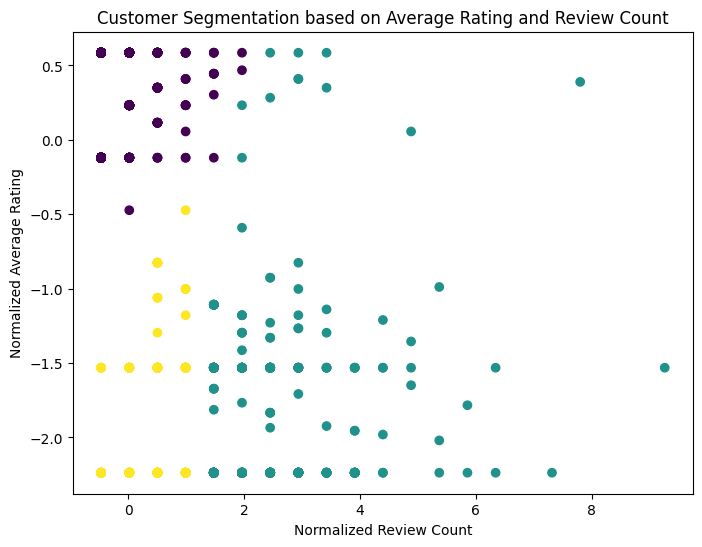

In [ ]:
# Filter data to focus on user reviews and their ratings
customer_data = filtered_reviews[['user_id', 'stars']].dropna()

# Group by user_id and calculate average rating and number of reviews per user
customer_summary = customer_data.groupby('user_id').agg(
    average_rating=('stars', 'mean'),
    review_count=('stars', 'size')
).reset_index()

# Normalize the data (standardize the number of reviews and average rating)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_summary[['average_rating', 'review_count']] = scaler.fit_transform(customer_summary[['average_rating', 'review_count']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_summary['cluster'] = kmeans.fit_predict(customer_summary[['average_rating', 'review_count']])

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_summary['review_count'], customer_summary['average_rating'], c=customer_summary['cluster'], cmap='viridis')
plt.title('Customer Segmentation based on Average Rating and Review Count')
plt.xlabel('Normalized Review Count')
plt.ylabel('Normalized Average Rating')
plt.show()

In [ ]:
# Filter customers with high ratings based on original star ratings (greater than 4.5)
high_rating_customers = filtered_reviews[filtered_reviews['stars'] > 4.5]

# Group by customer and calculate average rating and review count
high_rating_summary = high_rating_customers.groupby('user_id').agg(
    average_rating=('stars', 'mean'),
    review_count=('stars', 'size')
).reset_index()
print(high_rating_summary)

                     user_id  average_rating  review_count
0     --7XOV5T9yZR5w1DIy_Dog             5.0             1
1     -2SzFdggGxJKY9KcfLtIUQ             5.0             1
2     -3-qTpzQr0sf0lRmYNOeHA             5.0             1
3     -38jqwi3CRhWDIMXA9nhWQ             5.0             2
4     -4OFMjSiYAKT1MereIyfNA             5.0             1
...                      ...             ...           ...
2444  zsxIB8si8Iu1PAjOX6LzFw             5.0             1
2445  ztd67DJtPOYcr15AocZkLA             5.0             1
2446  zy3PMBLyygAvnWEHAsXrxg             5.0             1
2447  zyMglZEkEgHiblWfvePpcQ             5.0             1
2448  zyQcIz_DR9CM-Tah3B7Tfw             5.0             1

[2449 rows x 3 columns]


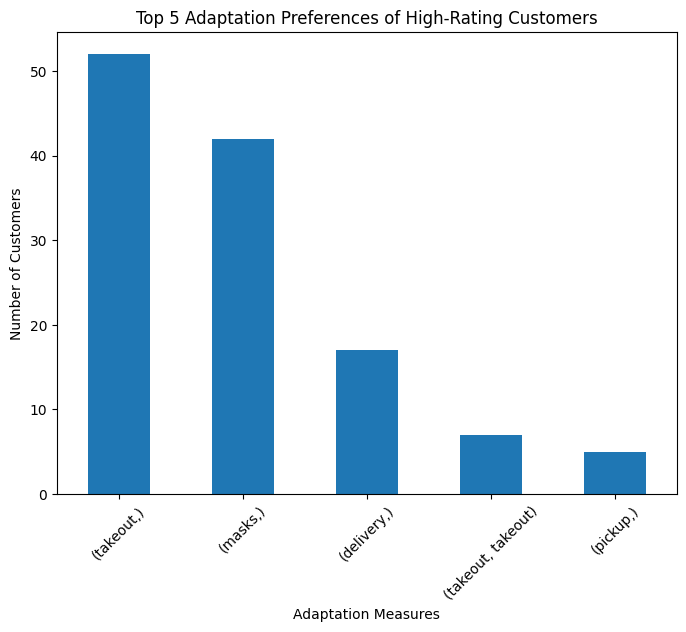

Top 5 adaptation preferences (excluding first) for high-rating customers: 
adaptation_entities
(takeout,)            52
(masks,)              42
(delivery,)           17
(takeout, takeout)     7
(pickup,)              5
Name: count, dtype: int64


In [ ]:
# Convert 'adaptation_entities' to a hashable type (e.g., tuple or string)
high_rating_customers['adaptation_entities'] = high_rating_customers['adaptation_entities'].apply(tuple)

# Now, you can drop duplicates
high_rating_with_adaptation = high_rating_customers[['user_id', 'adaptation_entities']].drop_duplicates()
high_rating_adapted_preferences = high_rating_with_adaptation['adaptation_entities'].value_counts()
top_5_adapted_preferences = high_rating_adapted_preferences.head(6).iloc[1:]

top_5_adapted_preferences.plot(kind='bar', figsize=(8, 6))
plt.title('Top 5 Adaptation Preferences of High-Rating Customers')
plt.xlabel('Adaptation Measures')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()
print(f"Top 5 adaptation preferences (excluding first) for high-rating customers: \n{top_5_adapted_preferences}")

**Targeting Loyal Customers for Promotions**

By identifying the high-rating clusters with consistent loyalty in leaving reviews, we can recommend targeting these customers for loyalty programs or special promotions.

In [ ]:
customer_summary = filtered_reviews.groupby('user_id').agg(
    average_rating=('stars', 'mean'),
    review_count=('stars', 'size'),
    first_review_date=('date', 'min'),
    last_review_date=('date', 'max')
).reset_index()

customer_summary['active_days'] = (pd.to_datetime(customer_summary['last_review_date']) -
                                   pd.to_datetime(customer_summary['first_review_date'])).dt.days

review_threshold = customer_summary['review_count'].quantile(0.9)
rating_threshold = 4.5
active_days_threshold = 180

loyal_customers = customer_summary[
    (customer_summary['review_count'] >= review_threshold) &
    (customer_summary['average_rating'] >= rating_threshold) &
    (customer_summary['active_days'] >= active_days_threshold)
]

print(f"Number of Loyal Customers: {len(loyal_customers)}")
print(loyal_customers.head())

loyal_customers.to_csv("loyal_customers.csv", index=False)

Number of Loyal Customers: 8
                     user_id  average_rating  review_count  \
528   8f8VU3RpwRKRowjzk5MtIg        5.000000             9   
951   H7Qcv2zW7-ytEIJMYeR6HA        4.833333             6   
1161  KltmAwd9TyvFgYbyrrutrA        5.000000             8   
1757  WBv6SzQSnbJFswU-kIAQPw        4.571429             7   
2150  c7AAg8s5W59yx8WwNxsbeA        4.800000             5   

       first_review_date    last_review_date  active_days  
528  2020-03-11 19:24:37 2020-11-11 22:34:20          245  
951  2020-03-05 04:01:44 2020-12-11 22:25:19          281  
1161 2020-05-21 22:52:31 2020-12-02 17:36:56          194  
1757 2020-03-03 02:37:07 2020-11-26 16:10:28          268  
2150 2020-03-28 19:57:43 2020-12-05 22:12:48          252  


In [ ]:
customer_summary

,user_id,average_rating,review_count,first_review_date,last_review_date,active_days
0,--2F5G5LKt3h2cAXJbZptg,4.0,1,2020-10-29 23:34:47,2020-10-29 23:34:47,0
1,--7XOV5T9yZR5w1DIy_Dog,5.0,1,2020-06-22 02:23:59,2020-06-22 02:23:59,0
2,-0wbdhyN-QjYlRJV9-b26Q,1.0,3,2020-11-07 04:24:09,2020-11-07 04:24:09,0
3,-2SzFdggGxJKY9KcfLtIUQ,5.0,1,2020-03-10 17:31:11,2020-03-10 17:31:11,0
4,-3-iwfM8jRCODUPWQOwmpg,4.0,1,2020-06-16 18:03:36,2020-06-16 18:03:36,0
...,...,...,...,...,...,...
3455,ztd67DJtPOYcr15AocZkLA,4.5,2,2020-03-04 06:15:57,2020-03-04 06:18:06,0
3456,ztgxiOrHshX8opNv-feicw,2.0,3,2020-11-15 02:12:17,2020-11-15 02:17:55,0
3457,zy3PMBLyygAvnWEHAsXrxg,5.0,1,2020-06-14 07:45:08,2020-06-14 07:45:08,0
3458,zyMglZEkEgHiblWfvePpcQ,5.0,1,2020-09-11 17:36:46,2020-09-11 17:36:46,0


In [ ]:
# Check the quantiles to understand the distribution
print("Quantiles for Average Rating:")
print(customer_summary['average_rating'].quantile([0.25, 0.5, 0.75, 1.0]))

print("Quantiles for Review Count:")
print(customer_summary['review_count'].quantile([0.25, 0.5, 0.75, 1.0]))

Quantiles for Average Rating:
0.25    4.0
0.50    5.0
0.75    5.0
1.00    5.0
Name: average_rating, dtype: float64
Quantiles for Review Count:
0.25     1.0
0.50     1.0
0.75     2.0
1.00    21.0
Name: review_count, dtype: float64


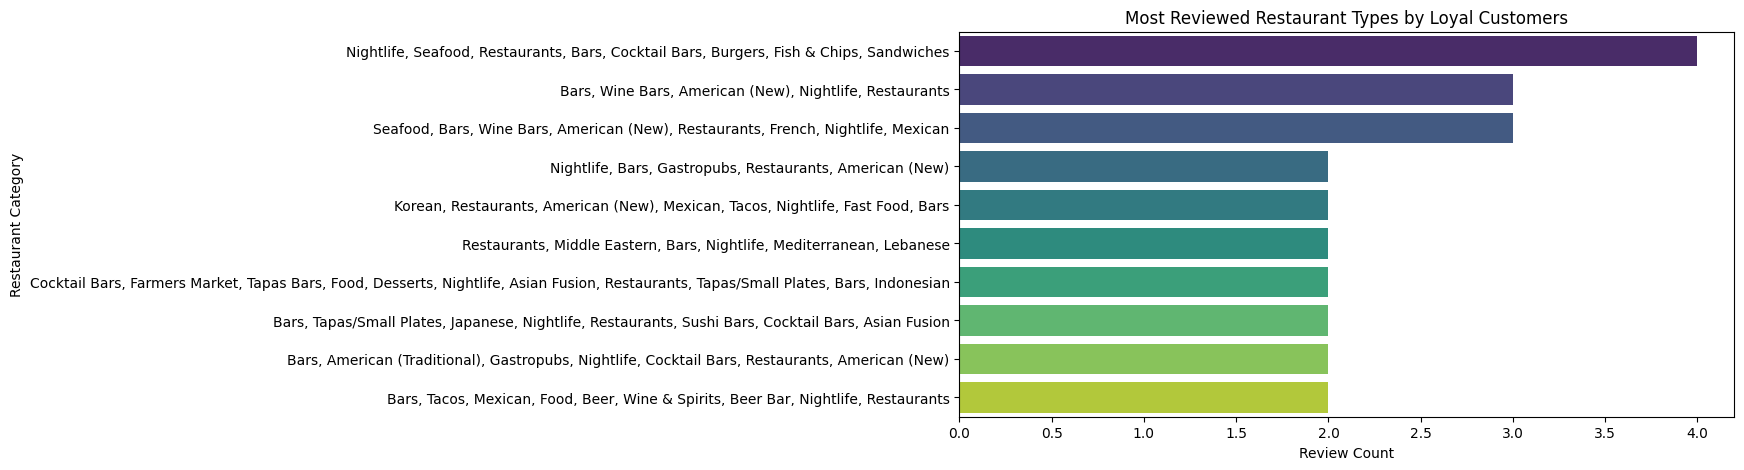

No 'price_level' data available for analysis.


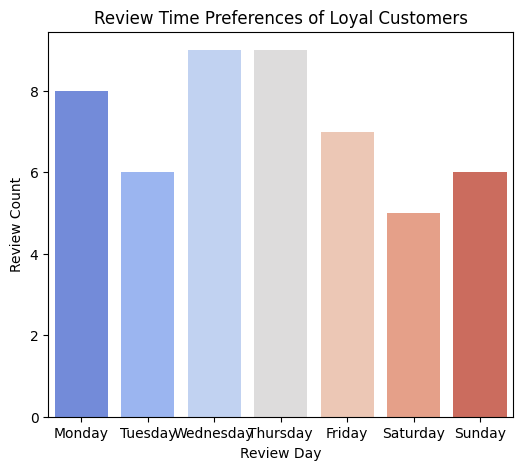

In [ ]:
if 'user_id' not in filtered_reviews.columns or 'user_id' not in loyal_customers.columns:
    raise KeyError("Missing 'user_id' column in one of the datasets. Please check your data.")

# user_id consistency
filtered_reviews['user_id'] = filtered_reviews['user_id'].astype(str)
loyal_customers['user_id'] = loyal_customers['user_id'].astype(str)

# preference of loyal customers
loyal_customers_reviews = filtered_reviews[filtered_reviews['user_id'].isin(loyal_customers['user_id'])]
loyal_business_reviews = pd.merge(loyal_customers_reviews, filtered_business[['business_id', 'categories']], on='business_id', how='left')
top_categories = loyal_business_reviews['categories'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.xlabel("Review Count")
plt.ylabel("Restaurant Category")
plt.title("Most Reviewed Restaurant Types by Loyal Customers")
plt.show()

# price range preference of loyal customers
if 'price_level' in filtered_business.columns:
    price_distribution = pd.merge(loyal_customers_reviews, filtered_business[['business_id', 'price_level']], on='business_id', how='left')
    price_counts = price_distribution['price_level'].value_counts()
    plt.figure(figsize=(8, 5))
    sns.barplot(x=price_counts.index, y=price_counts.values, palette="coolwarm")
    plt.xlabel("Price Level")
    plt.ylabel("Review Count")
    plt.title("Preferred Price Range of Loyal Customers")
    plt.show()
else:
    print("No 'price_level' data available for analysis.")

# time preference of loyal customers
loyal_customers_reviews['review_day'] = pd.to_datetime(loyal_customers_reviews['date']).dt.dayofweek
monday_reviews = (loyal_customers_reviews['review_day'] == 0).sum()
tuesday_reviews = (loyal_customers_reviews['review_day'] == 1).sum()
wednesday_reviews = (loyal_customers_reviews['review_day'] == 2).sum()
thursday_reviews = (loyal_customers_reviews['review_day'] == 3).sum()
friday_reviews = (loyal_customers_reviews['review_day'] == 4).sum()
saturday_reviews = (loyal_customers_reviews['review_day'] == 5).sum() # Corrected variable name from saturday_reviewsm to saturday_reviews
sunday_reviews = (loyal_customers_reviews['review_day'] == 6).sum()
plt.figure(figsize=(6, 5))
sns.barplot(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            y=[monday_reviews, tuesday_reviews, wednesday_reviews, thursday_reviews, friday_reviews, saturday_reviews, sunday_reviews],
            palette="coolwarm")
plt.xlabel("Review Day")
plt.ylabel("Review Count")
plt.title("Review Time Preferences of Loyal Customers")
plt.show()

In [ ]:
loyal_customers_reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Sentiment,preview,labels,month,topic,sentiment_score,sentiment_label,has_adaptation,adaptation_entities,review_day
568303,EPSr_EclpXMRavdKrOg2GA,8f8VU3RpwRKRowjzk5MtIg,XwnkfMUiyH-OsJXbmbOK5g,5.0,2.0,0.0,0.0,Always so happy to find myself here Amazing fo...,2020-04-25 01:34:44,1,happy find amazing food great customer service...,1,2020-04,-1,0.9763,1,False,[],5
589982,M5ZmXM_9kJlbfY4NlICXmw,WBv6SzQSnbJFswU-kIAQPw,_v3DcLatG70adfYzWTd-CQ,5.0,1.0,0.0,0.0,Cool vibe fresh local fish fruits and vegetabl...,2020-11-26 16:10:28,1,cool vibe fresh local fish fruit vegetable nee...,1,2020-11,-1,0.9886,1,False,[],3
615046,D79siZ0GFJxP6uVq8ioiHQ,KltmAwd9TyvFgYbyrrutrA,34Eqv8jXgxg_EEwcsNgeeg,5.0,2.0,2.0,2.0,Pop in for a quick blended fruit bowl or smoot...,2020-09-29 16:48:53,1,pop quick blend fruit bowl smoothie consistent...,1,2020-09,11,0.7579,1,False,[],1
697409,0YmD2kbsc6pf5EcRsbwisw,tsuKfuHyl4cPtD90oHGlug,ycbmvmBYk4w_ZmdrPL0tBQ,5.0,2.0,0.0,2.0,Ive been going to this place for months now an...,2020-06-13 02:06:43,1,ve go place month ve incredible experience foo...,1,2020-06,-1,0.9617,1,False,[],5
1280915,3xU39oUPQh0-RdQ-4ud-ZA,H7Qcv2zW7-ytEIJMYeR6HA,6HTGlttrzCMsuGBHO1ZGiw,5.0,3.0,0.0,2.0,THIS PLACE IS A MUST Im almost ashamed its tak...,2020-03-05 05:04:40,1,place m ashamed take long write 5 star review ...,1,2020-03,0,0.9475,1,False,[],3
2008573,45aCAYVjNpFh_4a2r-YhXg,c7AAg8s5W59yx8WwNxsbeA,cAbdvzqtFLaAAMFIyPf2AA,4.0,4.0,1.0,2.0,I came here for date night with my boyfriend a...,2020-12-05 22:12:48,1,come date night boyfriend soo good get cioppin...,1,2020-12,-1,0.9648,1,False,[],5
2059964,r1om3Bzlb1Nz3BZN_JA3Ow,H7Qcv2zW7-ytEIJMYeR6HA,YXaCcpETNtxrNNK6TbUTlw,5.0,1.0,0.0,1.0,This is my go to place for ramen takeout I jus...,2020-12-11 22:25:19,1,place raman takeout order spicy chicken black ...,1,2020-12,68,0.8619,1,True,"[takeout, delivery]",4
2115369,MKde5hV5Gz6FCATOekB9gA,KltmAwd9TyvFgYbyrrutrA,YXaCcpETNtxrNNK6TbUTlw,5.0,1.0,0.0,1.0,So far so good with this ramen I get the chas...,2020-12-02 17:36:56,1,far good raman chashu ramen flavor thick por...,1,2020-12,68,-0.7848,0,False,[],2
2727515,vN4tuBRL-KxafB3f8ZT01w,H7Qcv2zW7-ytEIJMYeR6HA,IRyKDIF51M0GcqS8yfPcYA,4.0,1.0,0.0,0.0,Mesa cafe is open for pick up I was in the mo...,2020-05-29 20:43:47,1,mesa cafe open pick mood healthy delicious d...,1,2020-05,-1,0.8885,1,False,[],4
3291943,94h50Amq_kbpRksK9MD8og,c7AAg8s5W59yx8WwNxsbeA,pKSB4wXLiS8rd1cAEgD8oA,5.0,1.0,0.0,1.0,I came here for my friends birthday before thi...,2020-03-28 19:57:43,1,come friend birthday coronavirus start m glad ...,1,2020-03,-1,0.9712,1,False,[],5


In [ ]:
food_keywords = [
    "burger", "pizza", "pasta", "taco", "sushi", "noodle", "salad", "fries", "steak", "chicken", "fish",
    "dessert", "soup", "coffee", "sandwich", "cake", "chips", "ice cream", "burrito", "ramen", "hotdog",
    "sandwiches", "dumplings", "spaghetti", "salads", "bbq", "grilled", "cheese", "eggroll", "nachos",
    "pancakes", "waffles", "smoothie", "vegan", "vegetarian", "fruit", "pudding", "croissant", "muffins", "cocktail"
    , "beer", "wine", "cocktails", "spirits", "happy hour", "brewery", "pub", "liquor", "barbecue", "mix"
]

vectorizer = CountVectorizer(max_features=50, ngram_range=(1, 3), stop_words='english')
X = vectorizer.fit_transform(loyal_customers_reviews['text'])
keywords = vectorizer.get_feature_names_out()
keyword_frequencies = X.toarray().sum(axis=0)
keyword_df = pd.DataFrame(list(zip(keywords, keyword_frequencies)), columns=['Keyword', 'Frequency'])
keyword_df = keyword_df.sort_values(by='Frequency', ascending=False)
filtered_keywords = keyword_df[keyword_df['Keyword'].isin([kw.lower() for kw in food_keywords])]
print(filtered_keywords.head(10))

       Keyword  Frequency
48        wine         19
34       ramen          7
14        fish          7
47  vegetarian          7


In [ ]:
food_keywords = ["wine", "fish", "ramen", "vegetarian"]
food_reviews = loyal_customers_reviews[loyal_customers_reviews['text'].str.contains('|'.join(food_keywords), case=False, na=False)]

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    else:
        return 'negative'


food_reviews['sentiment'] = food_reviews['text'].apply(get_sentiment)
sentiment_counts = food_reviews['sentiment'].value_counts()
print(sentiment_counts)

food_reviews_grouped = food_reviews.groupby('sentiment').agg({'text': 'count'}).reset_index()
print(food_reviews_grouped)
for keyword in food_keywords:
    keyword_reviews = food_reviews[food_reviews['text'].str.contains(keyword, case=False, na=False)]
    keyword_sentiment = keyword_reviews['sentiment'].value_counts()
    print(f"Sentiment for {keyword}:")
    print(keyword_sentiment)

sentiment
positive    16
negative     1
Name: count, dtype: int64
  sentiment  text
0  negative     1
1  positive    16
Sentiment for wine:
sentiment
positive    11
Name: count, dtype: int64
Sentiment for fish:
sentiment
positive    4
Name: count, dtype: int64
Sentiment for ramen:
sentiment
negative    1
positive    1
Name: count, dtype: int64
Sentiment for vegetarian:
sentiment
positive    3
Name: count, dtype: int64


In [ ]:
pd.set_option('display.max_colwidth', None)
ramen_negative_reviews = food_reviews[(food_reviews['text'].str.contains('ramen', case=False, na=False)) &                                       (food_reviews['sentiment'] == 'negative')]
print(ramen_negative_reviews[['user_id', 'text', 'sentiment']])

                        user_id  \
2059964  H7Qcv2zW7-ytEIJMYeR6HA   

                                                                                                                                                                                                                                                                                                            text  \
2059964  This is my go to place for ramen takeout I just ordered the Spicy Chicken Black Garlic Ramen and it was AMAZING We order from this place everytime and it does not disappoint They are quick with delivery too and the portions are big Highly recommend for my ramen cravers especially on  a cold day   

        sentiment  
2059964  negative  


Ramen Review Sentiment Misclassification:

Despite the review for ramen being overwhelmingly positive in tone—such as phrases like "AMAZING", "Highly recommend", and "does not disappoint"—the sentiment analysis algorithm incorrectly categorized it as negative. This misclassification is likely due to the presence of the word "disappoint", which, when isolated, can be a strong negative indicator for sentiment analysis tools like TextBlob. These tools often rely on word-level sentiment, and the word "disappoint" is commonly associated with negative sentiment, causing the algorithm to wrongly classify the entire review as negative.

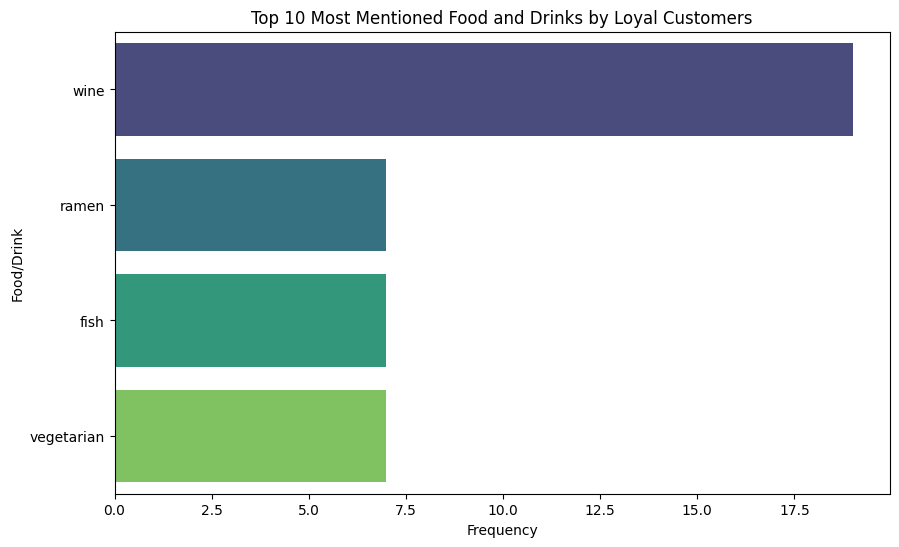

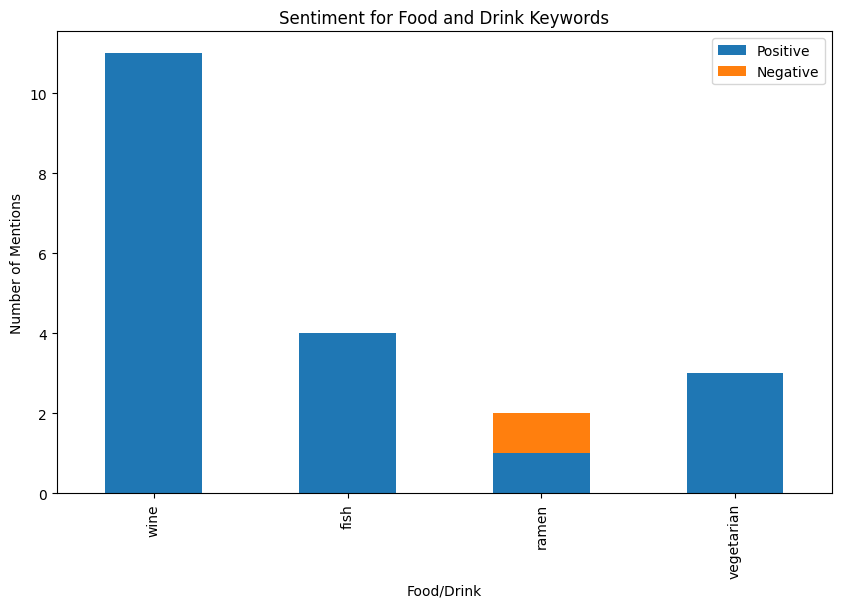

In [ ]:
# Create a bar plot to visualize the top 4 food/drink items based on frequency
top_food_keywords = filtered_keywords.head(4)
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=top_food_keywords, palette='viridis')
plt.title('Top 10 Most Mentioned Food and Drinks by Loyal Customers')
plt.xlabel('Frequency')
plt.ylabel('Food/Drink')
plt.show()

# Visualize the sentiment of food-related keywords
keyword_sentiment_df = []

# Calculate sentiment for each keyword
for keyword in food_keywords:
    keyword_reviews = food_reviews[food_reviews['text'].str.contains(keyword, case=False, na=False)]
    sentiment_counts = keyword_reviews['sentiment'].value_counts()
    sentiment_data = {
        'Keyword': keyword,
        'Positive': sentiment_counts.get('positive', 0),
        'Negative': sentiment_counts.get('negative', 0),
    }
    keyword_sentiment_df.append(sentiment_data)

sentiment_df = pd.DataFrame(keyword_sentiment_df)

sentiment_df.set_index('Keyword').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment for Food and Drink Keywords')
plt.ylabel('Number of Mentions')
plt.xlabel('Food/Drink')
plt.show()

- Bar Plot of Food/Drink Preferences: This will display the most frequently mentioned food and drink items (including wine, fish, ramen, and vegetarian dishes) based on the filtered keywords. The size of the bars represents the frequency of each item being mentioned.

- Sentiment Analysis: This bar chart will show the sentiment distribution (positive and negative) for each food or drink item, allowing us to see which items tend to have positive or negative sentiments.

By focusing on popular food and drink offerings, maintaining quality in takeout and delivery, and engaging loyal customers with loyalty programs and events, bar owners can enhance customer satisfaction and drive growth.

# **Generating Insights**

1. Customer Sentiment Trends
  
- Positive Sentiment from Adaptation Measures: Bars that introduced touchless, contactless, delivery, and takeout options received significantly higher sentiment scores. These services catered to customer preferences for safety and convenience.
- Impact of Negative Experiences: Specific negative reviews had a noticeable impact on sentiment. (For example, a review criticizing the truffle pizza and lack of ranch dressing led to a drop in customer satisfaction in November 2020.)
- Overall Sentiment Stability: Despite challenges, overall sentiment remained stable across the top business topics, suggesting that businesses were able to adapt effectively and maintain customer satisfaction.

2. Adaptation Measures Correlate with Customer Satisfaction
- High Sentiment for Touchless and Contactless Services: Customers particularly valued touchless and contactless payment options, as these services ensured a safer and more convenient dining experience.
- Negative Sentiment Toward Cleaning and Sanitation Issues: Customers often mentioned sanitation and cleaning measures negatively when there were concerns about hygiene standards. It suggests that while customers expect cleanliness, any perceived lapse could significantly harm their satisfaction.
- Mixed Reviews for Delivery and Pickup Services: While many businesses offered delivery and pickup services, the reviews were mixed due to delays, poor food quality, and logistical issues. Optimizing these services is critical to improve customer experience.

3. Operational Changes and Customer Ratings
- Restaurants with Delivery Services Had Higher Ratings: Bars and restaurants that implemented delivery services saw statistically significant improvements in both average ratings and review counts, reflecting higher customer engagement and satisfaction.
- Customer Engagement via Delivery: Higher review counts for businesses with delivery options suggest that these bars were more successful in maintaining customer relationships during the pandemic, ensuring convenience and safety.

4. Key Adaptation Measures Linked to Customer Loyalty
- Loyal Customer Preferences: Loyal customers (those who left numerous reviews) preferred bars offering services like takeout, masks, and delivery. These preferences reflect the shift in customer expectations toward safety, convenience, and operational resilience during the pandemic.
- High-Rating Customers Valued Contactless Services: Customers who gave high ratings (4.5 or above) particularly appreciated contactless services and bars that promoted safety measures.

5. Key Food Preference Based on Loyal Customers
- These four items (wine, fish, ramen, vegetarian) are the most favored by loyal customers, reflecting their preferences for diverse, healthy, and flavorful options, with wine and fish offering a refined dining experience, while ramen and vegetarian choices cater to comfort and dietary needs.

5. Recovery and Recovery Indicators for Bars
- Recovery in Average Star Ratings (March–December 2020): While average star ratings declined during the early months of the pandemic (March–June), ratings improved from July onward, peaking in November. Bars that optimized their operations for safety and convenience saw recovery in customer satisfaction.

# **Recommendations**

1. Customer Sentiment Trends
- For Bar Owners: Prioritize offering touchless and contactless payment options and ensure timely, quality delivery and takeout services to enhance customer satisfaction. Regularly monitor and address negative reviews swiftly to prevent reputational damage.
- For Policymakers: Encourage bars to adopt safety measures (e.g., contactless services, delivery) through incentives or guidelines. Create public awareness programs on the importance of maintaining hygiene and operational flexibility.
- For Consumers: Favor businesses that adapt well to the evolving public health situation and prioritize safety and convenience. Leave constructive feedback to help businesses improve.

2. Adaptation Measures Correlate with Customer Satisfaction
- For Bar Owners: Focus on visible sanitation and hygiene protocols. Introduce touchless payment and contactless options, and streamline delivery/pickup processes to ensure quality service.
- For Policymakers: Introduce sanitation guidelines and monitor business compliance to ensure public trust in bars and restaurants. Provide incentives for businesses that maintain high hygiene standards.
- For Consumers: Opt for businesses that provide transparent hygiene practices and services like contactless payment and delivery. Share positive feedback on businesses that maintain high standards of cleanliness.

3. Operational Changes and Customer Ratings
- For Bar Owners: Expand delivery and takeout services, ensuring fast, reliable, and high-quality service. Invest in delivery logistics, proper packaging, and staff training to reduce delays and enhance customer satisfaction.
- For Policymakers: Support bars in offering delivery services by providing resources or subsidies for infrastructure and technology upgrades.

4. Key Adaptation Measures Linked to Customer Loyalty
- For Bar Owners: Cater to loyal customers by maintaining and promoting essential adaptation measures, such as offering takeout, delivery, and contactless services. Ensure these services are well-communicated through marketing and signage.
- For Policymakers: Encourage businesses to cater to customer loyalty by providing frameworks and resources for businesses to implement adaptive measures.
- For Consumers: Engage with businesses that cater to health and safety while also offering convenience, as these businesses are more likely to maintain loyalty and quality during challenging times.

5. Key Food Preference Based on Loyal Customers
- For Bar Owners: Enhance menu variety and customization by offering a wider selection of wine, fish, ramen, and vegetarian options, catering to diverse customer preferences. Highlight these items through targeted marketing to attract loyal customers looking for healthy, flavorful, and comforting choices.

6. Recovery and Recovery Indicators for Bars
- For Bar Owners: Focus on recovery by continuing to enhance services like delivery and contactless payment. Monitor customer feedback and make necessary adjustments to improve satisfaction, particularly during the later months of the year.
- For Policymakers: Implement recovery programs that encourage businesses to innovate and enhance their operational capacity to ensure customer safety while boosting confidence.
- For Consumers: Support businesses that have shown resilience and adaptation through purchases, positive reviews, and patronage.

# **Conclusion**

By implementing the recommended adaptations, bar owners can improve customer satisfaction, loyalty, and engagement. For policymakers, encouraging businesses to adopt and promote safety measures will be crucial for recovery and growth. Consumers can support businesses that have shown resilience and care by providing feedback and engaging with their adapted services.


In sum, bars that successfully adapted to the challenges presented by the COVID-19 pandemic by prioritizing customer safety, convenience, and operational flexibility were able to recover more quickly and maintain customer satisfaction.